In [1]:
import numpy as np
import pandas as pd 

import random
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

sys.path.insert(1,'D:\\thesis-main\codes')
import time

from package.loadDb import *
from package.featureSelection_TENSORIZED import *
from package.featureSelection_TEMPORAL_PAGERANK import *
from package.featureSelection_SICE import *

from package.trmf import *
from package.trmf_regressor import *

from package.regressors import *

In [2]:
address = "..\\database\\appliances+energy+prediction\\energydata_complete.csv"
data_with_target =load_energydata_complete_dataframe(address)
data_without_target = data_with_target.drop(['Appliances'],axis=1)
target=data_with_target.iloc[:,0]

In [3]:
data_with_target

Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 17:00:00          60      30  19.890000  47.596667  19.200000   
2016-01-11 17:10:00          60      30  19.890000  46.693333  19.200000   
2016-01-11 17:20:00          50      30  19.890000  46.300000  19.200000   
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
2016-01-11 17:40:00          60      40  19.890000  46.333333  19.200000   
...                         ...     ...        ...        ...        ...   
2016-05-27 17:20:00         100       0  25.566667  46.560000  25.890000   
2016-05-27 17:30:00          90       0  25.500000  46.500000  25.754000   
2016-05-27 17:40:00         270      10  25.500000  46.596667  25.628571   
2016-05-27 17:50:00         420      10  25.500000  46.990000  25.414000   
2016-05-27 18:00:00         430      10  25.500000  46.600000  25.264286   

                          RH_2         T3       RH_3         T4       RH_4  \
date                                                                         
2016-01-11 17:00:00  44.790000  19.790000  44.730000  19.000000  45.566667   
2016-01-11 17:10:00  44.722500  19.790000  44.790000  19.000000  45.992500   
2016-01-11 17:20:00  44.626667  19.790000  44.933333  18.926667  45.890000   
2016-01-11 17:30:00  44.590000  19.790000  45.000000  18.890000  45.723333   
2016-01-11 17:40:00  44.530000  19.790000  45.000000  18.890000  45.530000   
...                        ...        ...        ...        ...        ...   
2016-05-27 17:20:00  42.025714  27.200000  41.163333  24.700000  45.590000   
2016-05-27 17:30:00  42.080000  27.133333  41.223333  24.700000  45.590000   
2016-05-27 17:40:00  42.768571  27.050000  41.690000  24.700000  45.730000   
2016-05-27 17:50:00  43.036000  26.890000  41.290000  24.700000  45.790000   
2016-05-27 18:00:00  42.971429  26.823333  41.156667  24.700000  45.963333   

                     ...         T9     RH_9      T_out  Press_mm_hg  \
date                 ...                                               
2016-01-11 17:00:00  ...  17.033333  45.5300   6.600000        733.5   
2016-01-11 17:10:00  ...  17.066667  45.5600   6.483333        733.6   
2016-01-11 17:20:00  ...  17.000000  45.5000   6.366667        733.7   
2016-01-11 17:30:00  ...  17.000000  45.4000   6.250000        733.8   
2016-01-11 17:40:00  ...  17.000000  45.4000   6.133333        733.9   
...                  ...        ...      ...        ...          ...   
2016-05-27 17:20:00  ...  23.200000  46.7900  22.733333        755.2   
2016-05-27 17:30:00  ...  23.200000  46.7900  22.600000        755.2   
2016-05-27 17:40:00  ...  23.200000  46.7900  22.466667        755.2   
2016-05-27 17:50:00  ...  23.200000  46.8175  22.333333        755.2   
2016-05-27 18:00:00  ...  23.200000  46.8450  22.200000        755.2   

                        RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
date                                                                          
2016-01-11 17:00:00  92.000000   7.000000   63.000000   5.300000  13.275433   
2016-01-11 17:10:00  92.000000   6.666667   59.166667   5.200000  18.606195   
2016-01-11 17:20:00  92.000000   6.333333   55.333333   5.100000  28.642668   
2016-01-11 17:30:00  92.000000   6.000000   51.500000   5.000000  45.410389   
2016-01-11 17:40:00  92.000000   5.666667   47.666667   4.900000  10.084097   
...                        ...        ...         ...        ...        ...   
2016-05-27 17:20:00  55.666667   3.333333   23.666667  13.333333  43.096812   
2016-05-27 17:30:00  56.000000   3.500000   24.500000  13.300000  49.282940   
2016-05-27 17:40:00  56.333333   3.666667   25.333333  13.266667  29.199117   
2016-05-27 17:50:00  56.666667   3.833333   26.166667  13.233333   6.322784   
2016-05-27 18:00:00  57.000000   4.000000   27.000000  13.200000  34.118851   

                           rv2  
date               

In [5]:

data_with_target.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

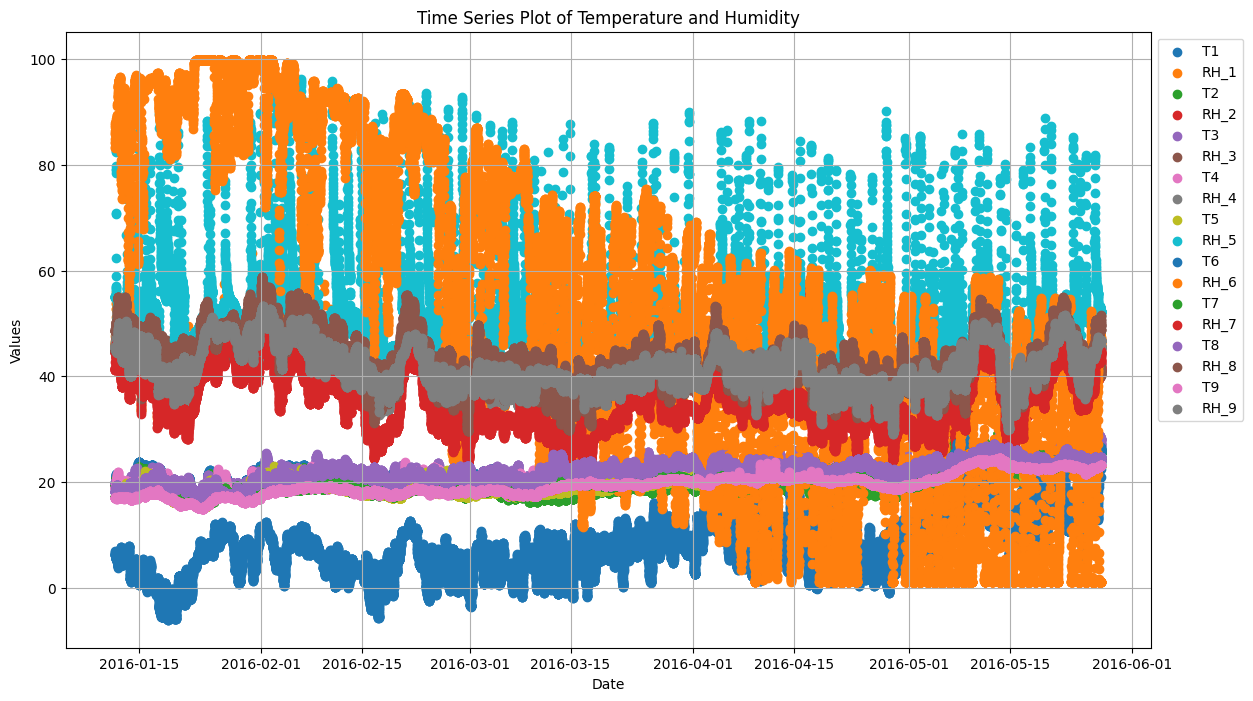

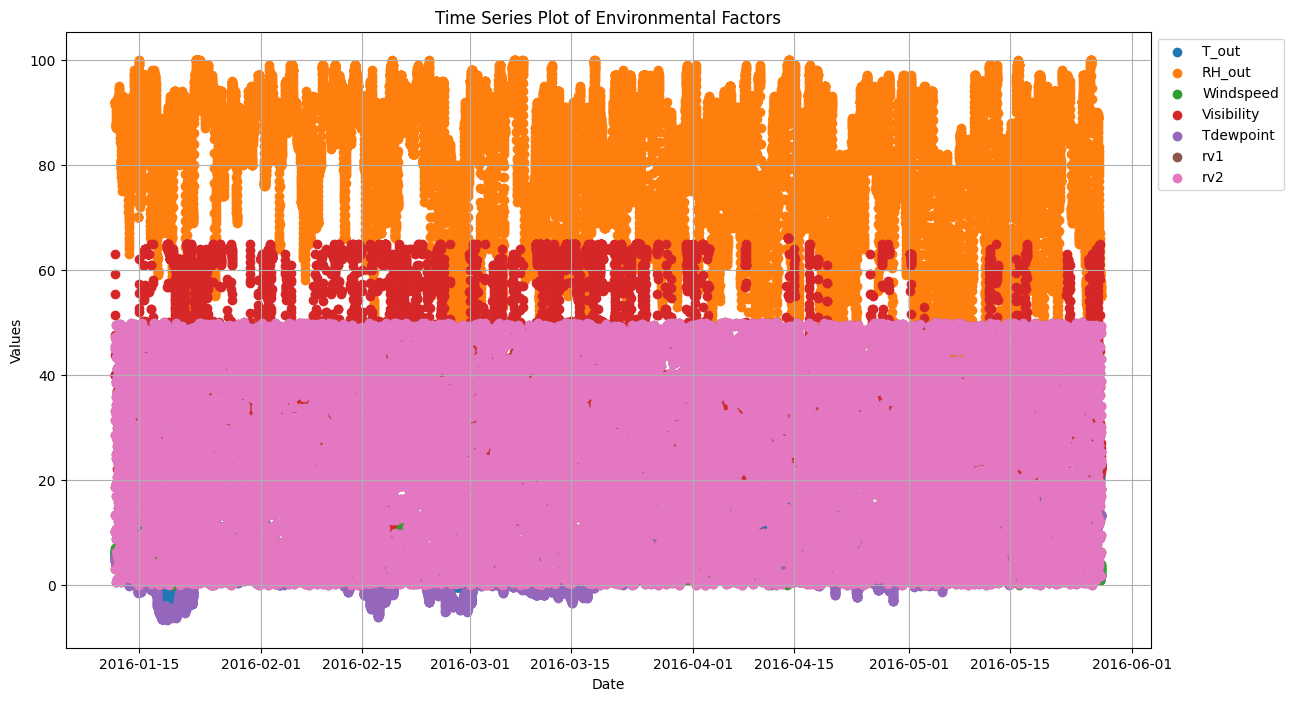

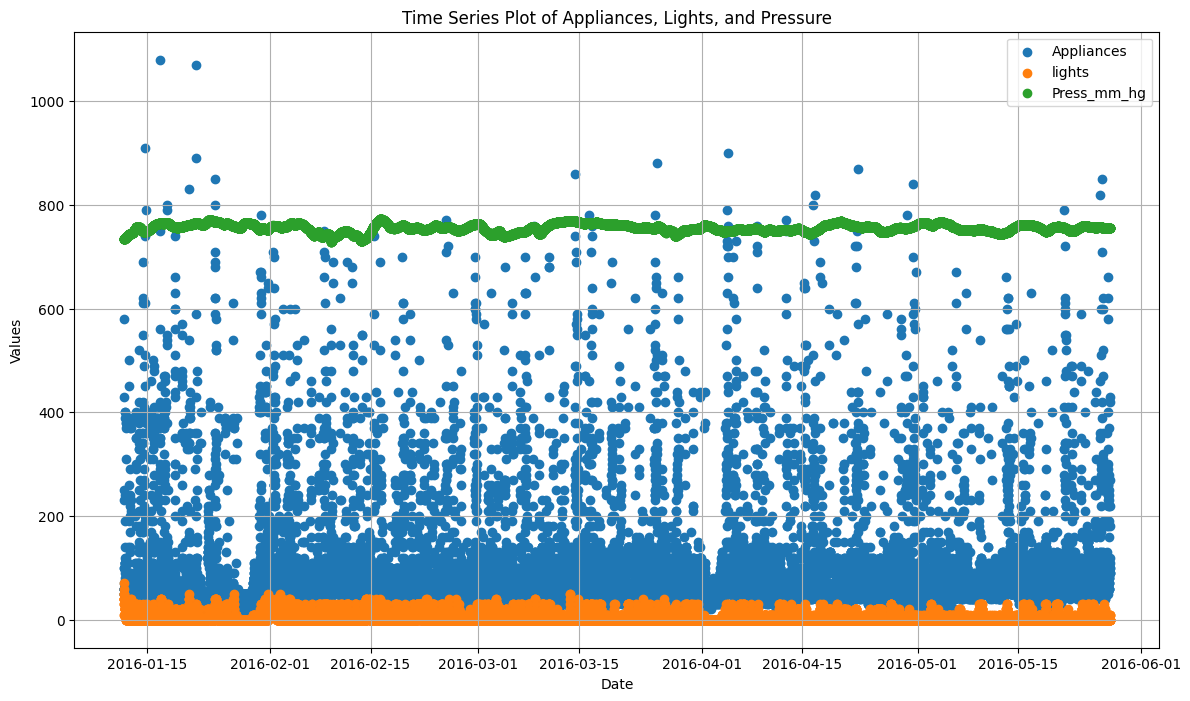

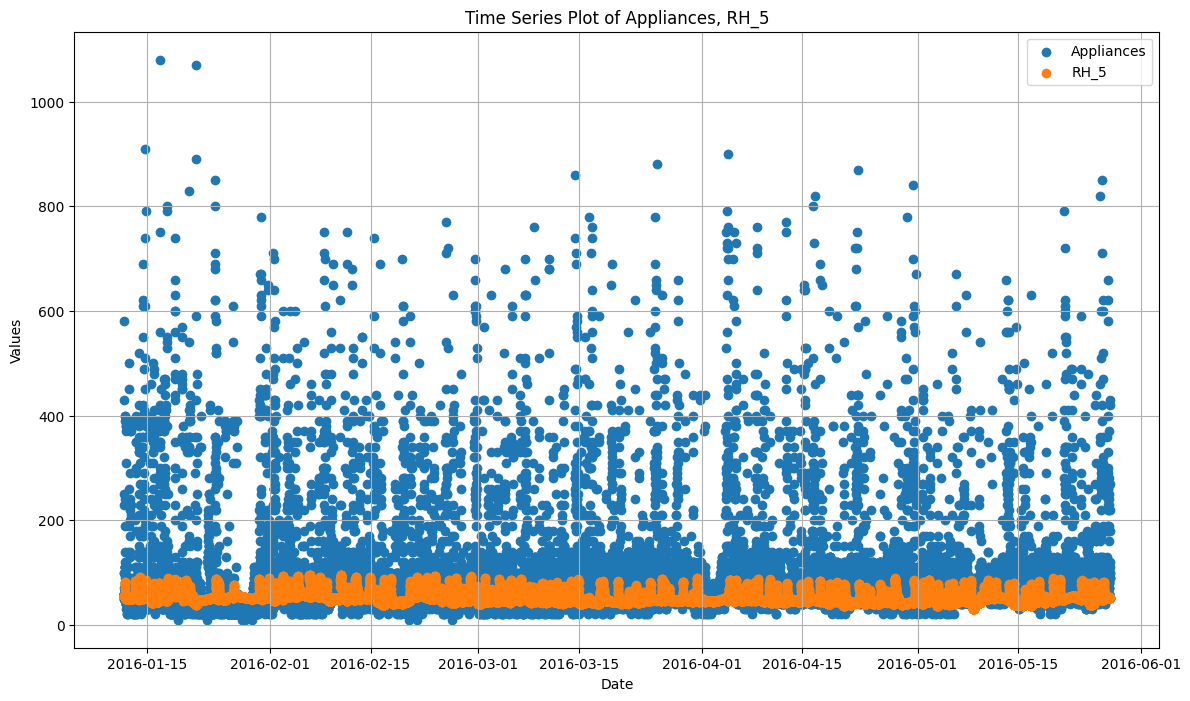

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded in a DataFrame called data_with_target
# Example column lists
col1 = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
        'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
        'RH_9']
col2 = ['T_out', 'RH_out', 'Windspeed', 'Visibility',
        'Tdewpoint', 'rv1', 'rv2']
col3 = ['Appliances', 'lights', 'Press_mm_hg']
col4=['Appliances','RH_5']

# Function to create scatter plots
def plot_columns(column_list, title):
    plt.figure(figsize=(14, 8))
    for column in column_list:
        plt.scatter(data_with_target.index, data_with_target[column], label=column)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Time Series Plot of {title}')
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

# Plot for col1
plot_columns(col1, 'Temperature and Humidity')

# Plot for col2
plot_columns(col2, 'Environmental Factors')

# Plot for col3
plot_columns(col3, 'Appliances, Lights, and Pressure')
plot_columns(col4, 'Appliances, RH_5')



In [5]:
address = "..\\database\\appliances+energy+prediction\\energydata_complete.csv"
data_with_target =load_energydata_complete_dataframe(address)
data_without_target = data_with_target.drop(['Appliances'],axis=1)
target=data_with_target.iloc[:,0]

In [7]:
#segment sizes
interval=600
testSize=int(.2*interval)
#energy of pca to compute number of components
tol=.89
testSize

120

In [14]:
# trmf parameters..............................................
lags = [1,30]
# K = 4######### changes besed on pca energy
lambda_f = 1.
lambda_x = 1
lambda_w = 1.
alpha = 1000.
eta = 1.
max_iteration=10000
# num_comp=K

In [12]:
num_comp_list=[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1]

In [16]:
i

32

In [17]:
from itertools import product

# Define parameter grids
lags_list = [[1], [1, 30]]
lambda_f_list = [0.1, 1., 10.]
lambda_x_list = [0.1, 1., 10.]
lambda_w_list = [0.1, 1., 10.]
alpha_list = [100, 1000, 10000]
eta_list = [0.1, 1., 10.]

# Store all RMSE results for each segment and parameter combination
results = []

counter = 0


# Iterate over all combinations of parameters except K
for lags, lambda_f, lambda_x, lambda_w, alpha, eta in product(lags_list, lambda_f_list, lambda_x_list, lambda_w_list, alpha_list, eta_list):
    i = 0
    for j in range(data_without_target.shape[0] // interval):
        start_index = j * interval
        end_index = start_index + interval

        K = num_comp_list[i]  # Each segment has different k
        data = data_without_target.to_numpy().T
        data = data[:, start_index:end_index]
        target_cut = target.iloc[start_index:end_index]

        T_train = data.shape[1]
        st = time.time()  # Start timer
        data_normalized = normalized_data(data, T_train, 0, normalize=True)

        model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)
        model.fit(data_normalized, max_iter=max_iteration)
        et = time.time()  # End timer
        elapsed_time = et - st
        runtime.append(elapsed_time)

        # Get reduced data
        new_features = model.X.T
        rmse = xgboost_reg_error(new_features, target_cut, testSize)
        trmf_rmse_list.append(rmse)

        # Store the parameters and RMSE for this segment
        results.append({
            'segment': j,
            'K': K,
            'lags': lags,
            'lambda_f': lambda_f,
            'lambda_x': lambda_x,
            'lambda_w': lambda_w,
            'alpha': alpha,
            'eta': eta,
            'rmse': rmse,
            'runtime': elapsed_time
        })

        i += 1
        print(f"Iteration {i}, Segment {j}, K={K}, RMSE={rmse}, Time={elapsed_time}")
        print("----------------------------------------------------------------------------")

# Convert results to a DataFrame for easier analysis and visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Example: Save results to a CSV file for later analysis
results_df.to_csv('trmf_tuning_results.csv', index=False)

# Now you can analyze or visualize the results


Iteration 1, Segment 0, K=1, RMSE=0.8558274943327089, Time=3.049837827682495
----------------------------------------------------------------------------
Iteration 2, Segment 1, K=1, RMSE=0.9380517802489043, Time=3.1445868015289307
----------------------------------------------------------------------------
Iteration 3, Segment 2, K=1, RMSE=0.4740019071498022, Time=3.08772349357605
----------------------------------------------------------------------------
Iteration 4, Segment 3, K=1, RMSE=3.528282743446244, Time=2.872314214706421
----------------------------------------------------------------------------
Iteration 5, Segment 4, K=1, RMSE=1.7388390455578213, Time=2.8473808765411377
----------------------------------------------------------------------------
Iteration 6, Segment 5, K=1, RMSE=1.453881823465869, Time=2.7606115341186523
----------------------------------------------------------------------------
Iteration 7, Segment 6, K=1, RMSE=1.1080944319467627, Time=2.899241685867309

D:\thesis-main\codes\package\trmf.py:294: RuntimeWarning: overflow encountered in multiply
  z_2 = - (np.roll(self.X, -lag, axis=1) - X_l) * W_l
D:\thesis-main\codes\package\trmf.py:320: RuntimeWarning: invalid value encountered in subtract
  z_1 = self.X - np.roll(X_l, lag, axis=1)
D:\thesis-main\codes\package\trmf.py:322: RuntimeWarning: invalid value encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)


Iteration 1, Segment 0, K=1, RMSE=0.705598314503671, Time=2.9151992797851562
----------------------------------------------------------------------------


D:\thesis-main\codes\package\trmf.py:298: RuntimeWarning: overflow encountered in multiply
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X
D:\thesis-main\codes\package\trmf.py:319: RuntimeWarning: overflow encountered in multiply
  X_l = self.X * W_l


Iteration 2, Segment 1, K=1, RMSE=0.8165061927061286, Time=2.840399742126465
----------------------------------------------------------------------------
Iteration 3, Segment 2, K=1, RMSE=0.5797845406502379, Time=3.0867409706115723
----------------------------------------------------------------------------


D:\thesis-main\codes\package\trmf.py:322: RuntimeWarning: overflow encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
D:\thesis-main\codes\package\trmf.py:297: RuntimeWarning: invalid value encountered in add
  grad_T_x = z_1 + z_2
D:\thesis-main\codes\package\trmf.py:298: RuntimeWarning: invalid value encountered in add
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X


Iteration 4, Segment 3, K=1, RMSE=1.4493541601459932, Time=2.825438976287842
----------------------------------------------------------------------------


D:\thesis-main\codes\package\trmf.py:291: RuntimeWarning: overflow encountered in multiply
  X_l = self.X * W_l


Iteration 5, Segment 4, K=1, RMSE=0.7637199207856079, Time=2.889267921447754
----------------------------------------------------------------------------
Iteration 6, Segment 5, K=1, RMSE=1.0650487075066268, Time=2.880289077758789
----------------------------------------------------------------------------
Iteration 7, Segment 6, K=1, RMSE=0.7032282704805414, Time=2.7975149154663086
----------------------------------------------------------------------------
Iteration 8, Segment 7, K=1, RMSE=0.6861850865022776, Time=2.830425977706909
----------------------------------------------------------------------------
Iteration 9, Segment 8, K=2, RMSE=0.5684217005712117, Time=3.4308197498321533
----------------------------------------------------------------------------
Iteration 10, Segment 9, K=1, RMSE=0.6400589860802879, Time=2.8264362812042236
----------------------------------------------------------------------------
Iteration 11, Segment 10, K=1, RMSE=0.7592672269659047, Time=2.841387987

c:\Users\User.MORADI-PC\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Iteration 1, Segment 0, K=1, RMSE=0.705598314503671, Time=2.8613429069519043
----------------------------------------------------------------------------
Iteration 2, Segment 1, K=1, RMSE=0.8165061927061286, Time=2.799508810043335
----------------------------------------------------------------------------
Iteration 3, Segment 2, K=1, RMSE=0.5797845406502379, Time=2.8483786582946777
----------------------------------------------------------------------------
Iteration 4, Segment 3, K=1, RMSE=1.4493541601459932, Time=2.786543130874634
----------------------------------------------------------------------------
Iteration 5, Segment 4, K=1, RMSE=0.7637199207856079, Time=2.8384017944335938
----------------------------------------------------------------------------
Iteration 6, Segment 5, K=1, RMSE=1.0650487075066268, Time=2.766596555709839
----------------------------------------------------------------------------
Iteration 7, Segment 6, K=1, RMSE=0.7032282704805414, Time=2.7915296554565

D:\thesis-main\codes\package\trmf.py:271: RuntimeWarning: overflow encountered in multiply
  return - 2 * np.dot((self.Y - np.dot(self.F, self.X)) * self.mask, self.X.T) + 2 * self.lambda_f * self.F


Iteration 16, Segment 15, K=1, RMSE=0.8569922049009361, Time=2.800506591796875
----------------------------------------------------------------------------
Iteration 17, Segment 16, K=2, RMSE=0.7163237261434897, Time=3.4407927989959717
----------------------------------------------------------------------------
Iteration 18, Segment 17, K=1, RMSE=0.7165037914754567, Time=2.7805588245391846
----------------------------------------------------------------------------
Iteration 19, Segment 18, K=1, RMSE=0.5642246625037765, Time=2.843390941619873
----------------------------------------------------------------------------
Iteration 20, Segment 19, K=4, RMSE=0.34008086688496336, Time=3.6442489624023438
----------------------------------------------------------------------------
Iteration 21, Segment 20, K=1, RMSE=1.122712415490502, Time=2.800506353378296
----------------------------------------------------------------------------
Iteration 22, Segment 21, K=1, RMSE=0.5698161520564516, Time=

D:\thesis-main\codes\package\trmf.py:298: RuntimeWarning: overflow encountered in add
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X


Iteration 9, Segment 8, K=2, RMSE=0.5684217005712117, Time=3.432814359664917
----------------------------------------------------------------------------
Iteration 10, Segment 9, K=1, RMSE=0.6400589860802879, Time=2.8663294315338135
----------------------------------------------------------------------------
Iteration 11, Segment 10, K=1, RMSE=0.7592672269659047, Time=2.8154661655426025
----------------------------------------------------------------------------
Iteration 12, Segment 11, K=1, RMSE=0.7508914898818451, Time=2.8254401683807373
----------------------------------------------------------------------------
Iteration 13, Segment 12, K=1, RMSE=0.7457491550621534, Time=2.859344244003296
----------------------------------------------------------------------------
Iteration 14, Segment 13, K=1, RMSE=0.5951156408921048, Time=2.8094825744628906
----------------------------------------------------------------------------
Iteration 15, Segment 14, K=2, RMSE=0.43999008647549315, Time=3

D:\thesis-main\codes\package\trmf.py:325: RuntimeWarning: overflow encountered in multiply
  self.alpha * 2 * (1 - self.W.sum(axis=1)).repeat(self.L).reshape(self.W.shape)


Iteration 9, Segment 8, K=2, RMSE=0.5684217005712117, Time=3.6801531314849854
----------------------------------------------------------------------------
Iteration 10, Segment 9, K=1, RMSE=0.6400589860802879, Time=3.151566505432129
----------------------------------------------------------------------------
Iteration 11, Segment 10, K=1, RMSE=0.7592672269659047, Time=2.878298282623291
----------------------------------------------------------------------------
Iteration 12, Segment 11, K=1, RMSE=0.7508914898818451, Time=2.9191880226135254
----------------------------------------------------------------------------
Iteration 13, Segment 12, K=1, RMSE=0.7457491550621534, Time=2.872314929962158
----------------------------------------------------------------------------
Iteration 14, Segment 13, K=1, RMSE=0.5951156408921048, Time=2.794522523880005
----------------------------------------------------------------------------
Iteration 15, Segment 14, K=2, RMSE=0.43999008647549315, Time=3.4

D:\thesis-main\codes\package\trmf.py:292: RuntimeWarning: invalid value encountered in subtract
  z_1 = self.X - np.roll(X_l, lag, axis=1)
D:\thesis-main\codes\package\trmf.py:294: RuntimeWarning: invalid value encountered in subtract
  z_2 = - (np.roll(self.X, -lag, axis=1) - X_l) * W_l


Iteration 10, Segment 9, K=1, RMSE=0.6400589860802879, Time=2.775573492050171
----------------------------------------------------------------------------
Iteration 11, Segment 10, K=1, RMSE=0.7592672269659047, Time=2.8633370399475098
----------------------------------------------------------------------------
Iteration 12, Segment 11, K=1, RMSE=0.7508914898818451, Time=2.7745754718780518
----------------------------------------------------------------------------
Iteration 13, Segment 12, K=1, RMSE=0.7457491550621534, Time=2.795518398284912
----------------------------------------------------------------------------
Iteration 14, Segment 13, K=1, RMSE=0.5951156408921048, Time=2.804494857788086
----------------------------------------------------------------------------
Iteration 15, Segment 14, K=2, RMSE=0.43999008647549315, Time=3.377963066101074
----------------------------------------------------------------------------
Iteration 16, Segment 15, K=1, RMSE=0.8569922049009361, Time=2

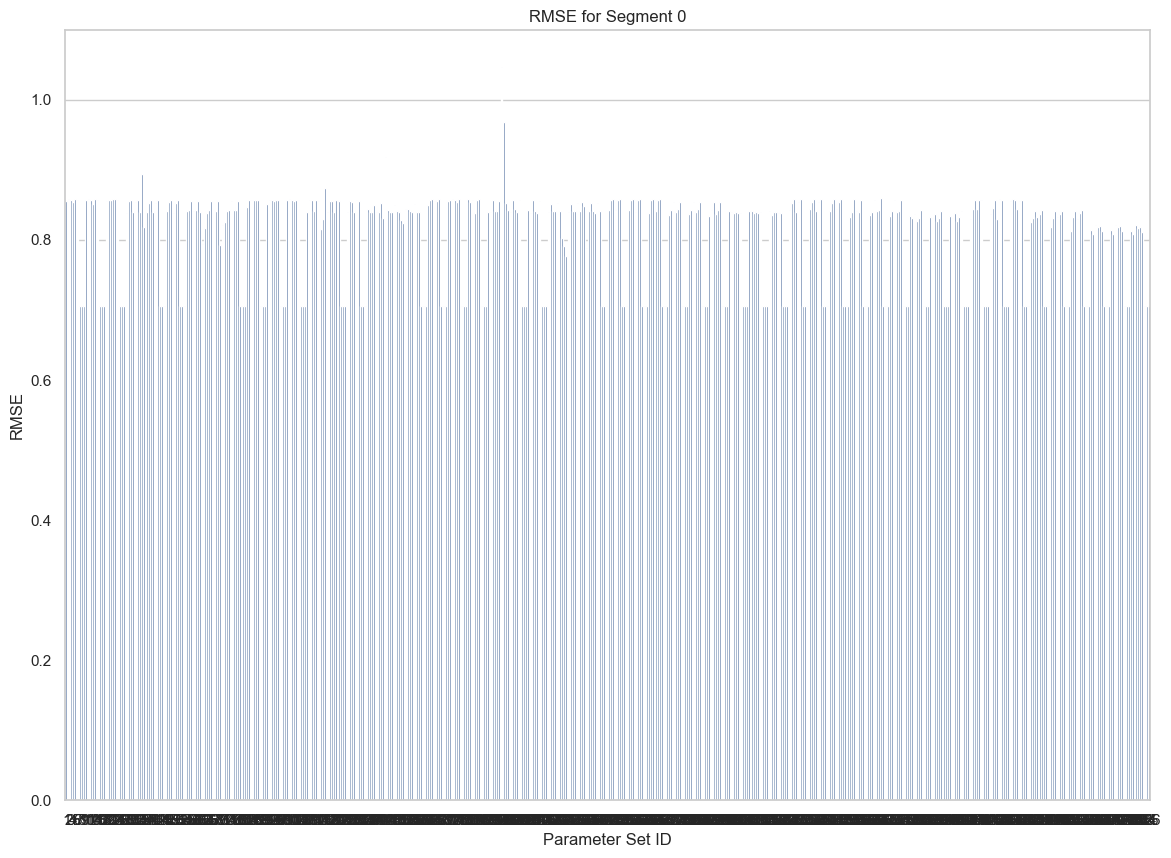

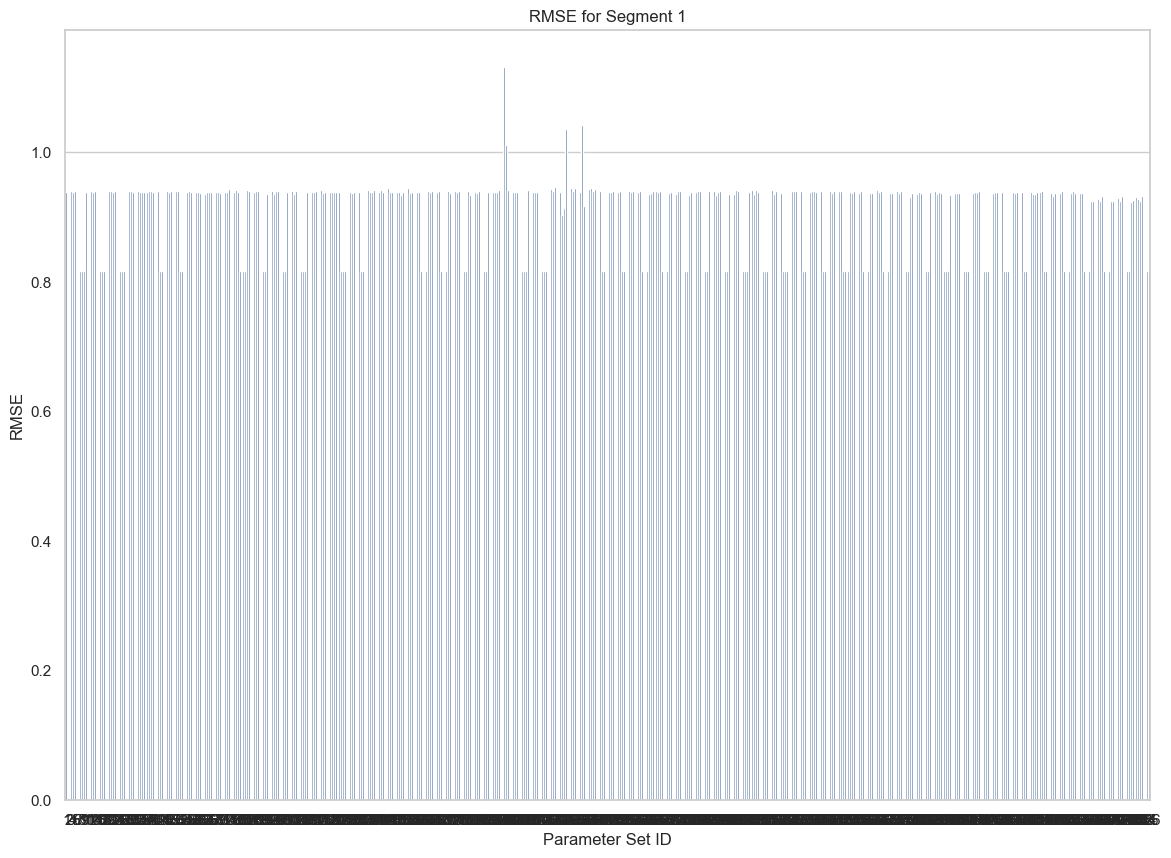

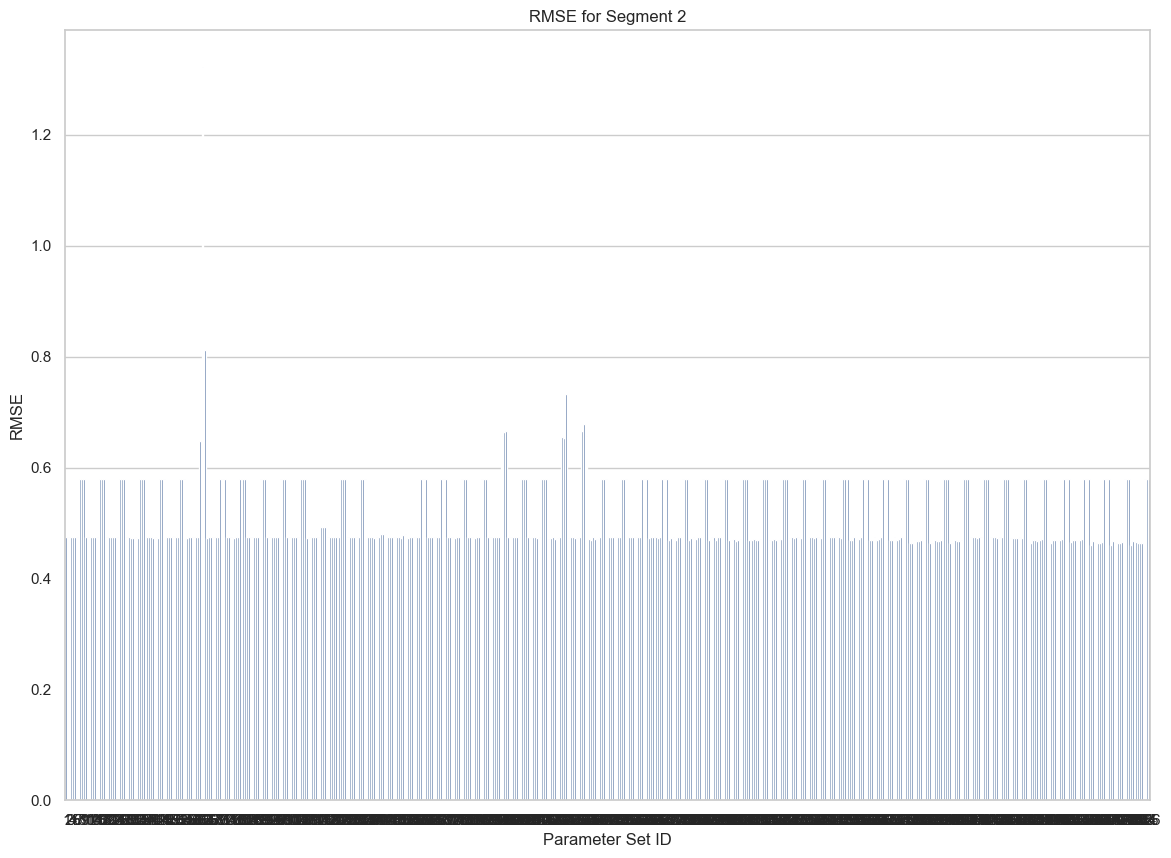

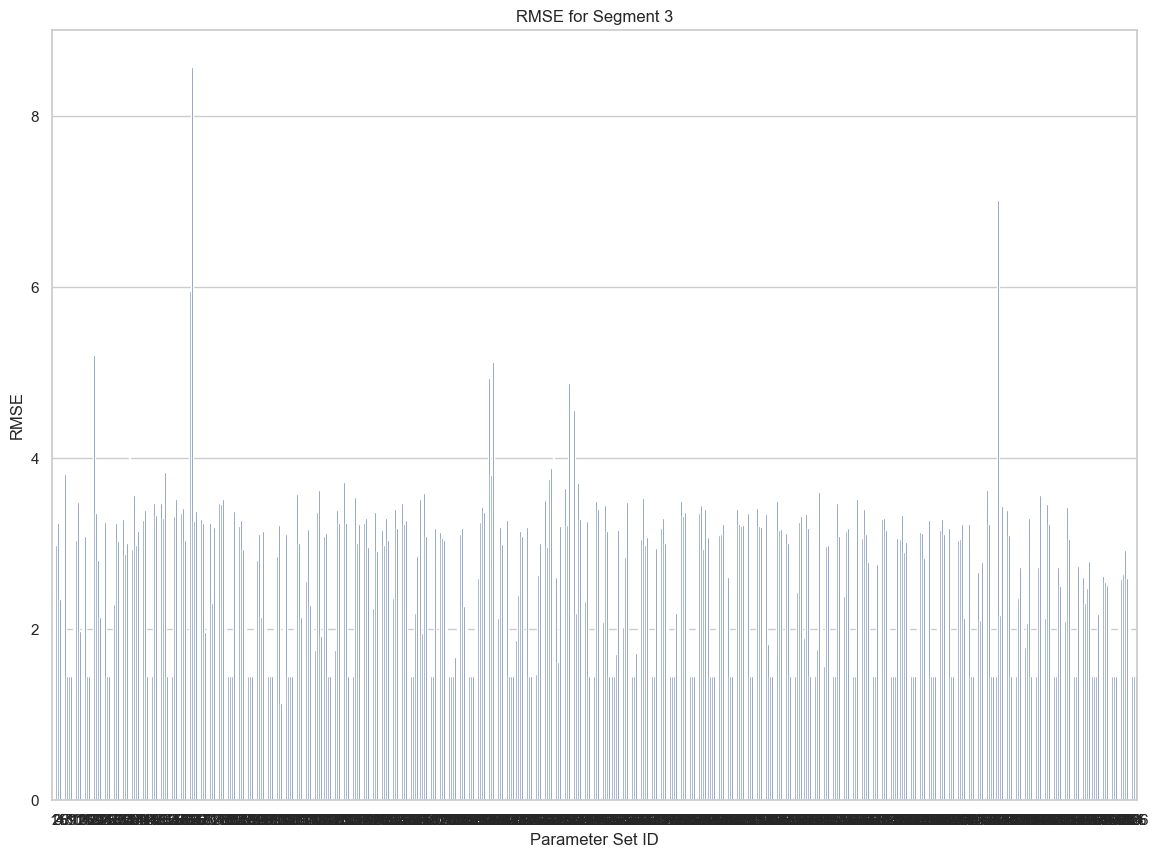

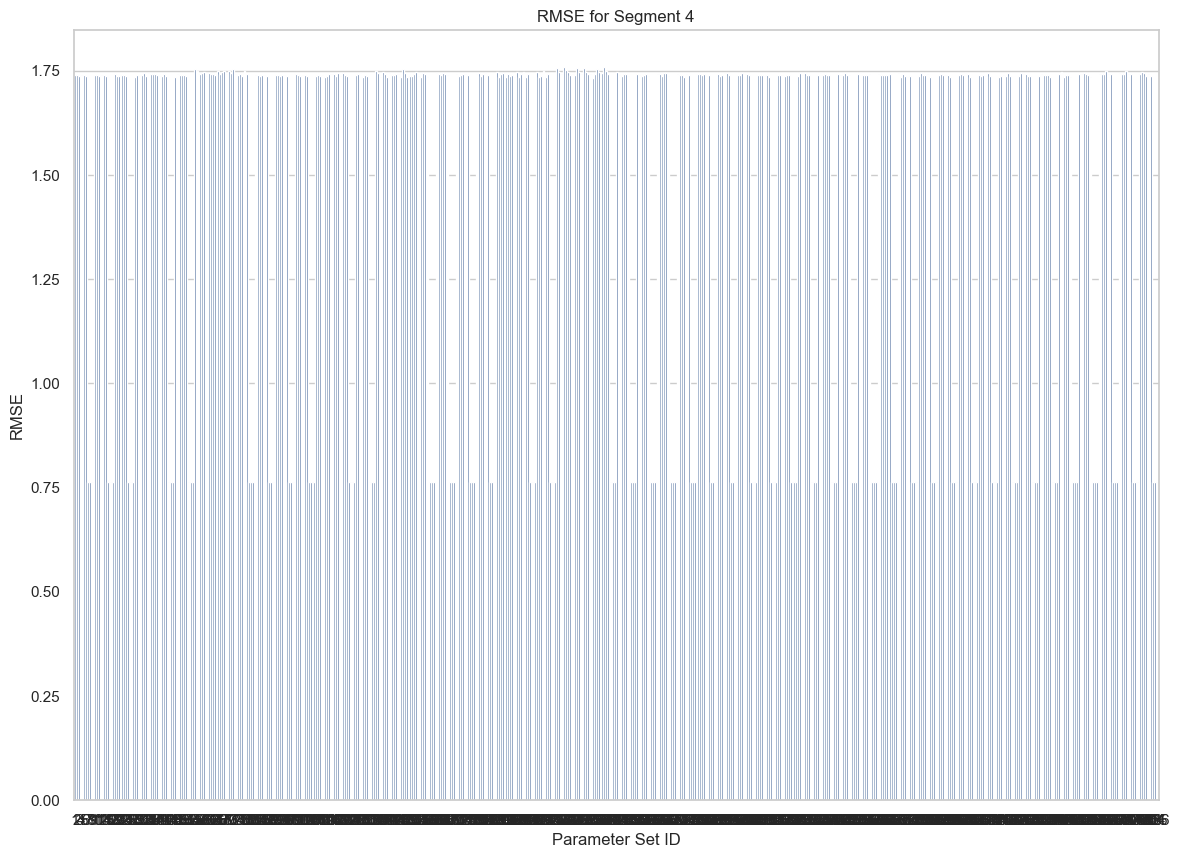

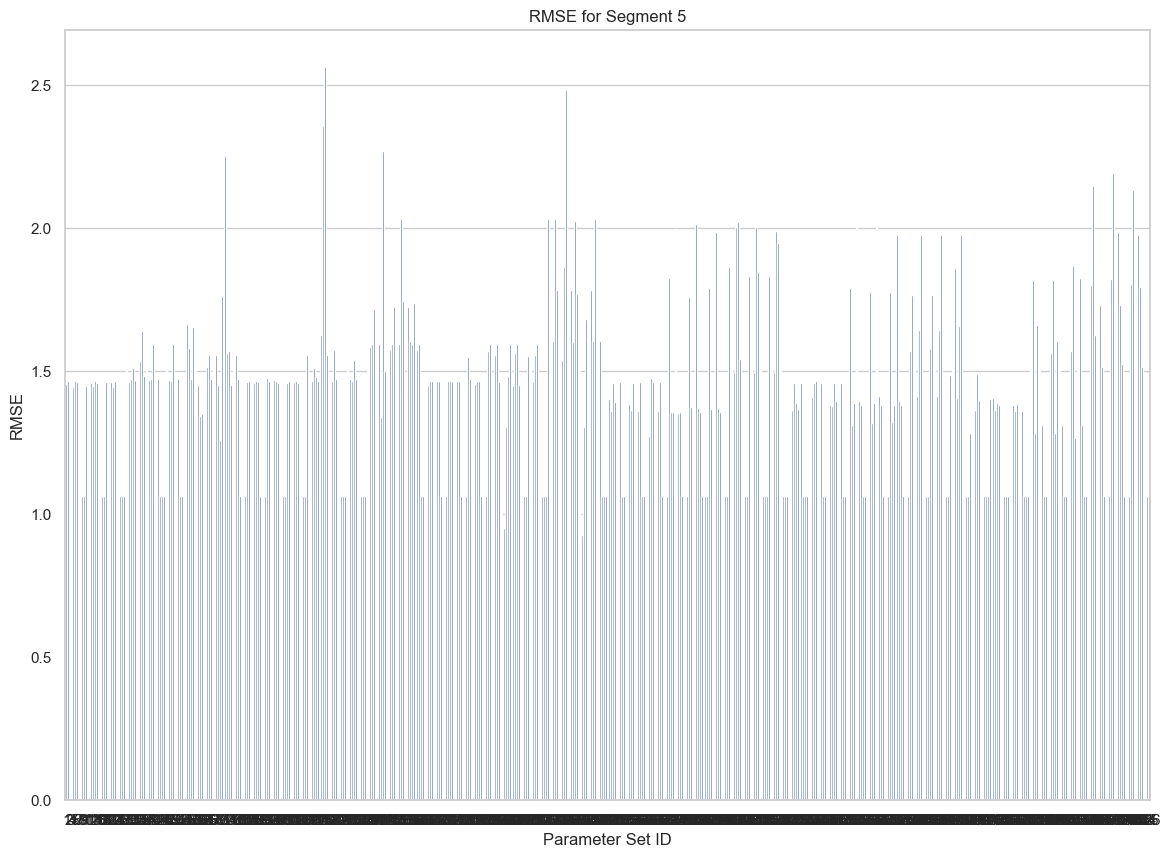

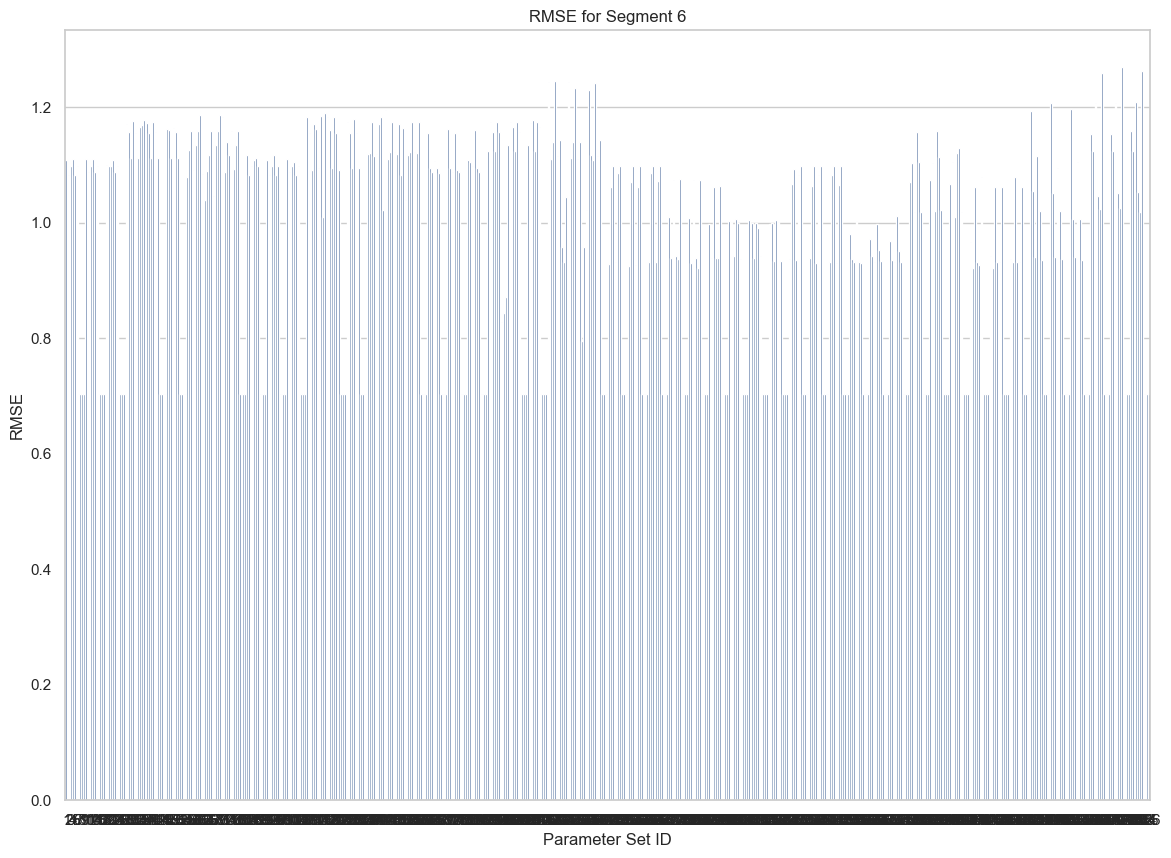

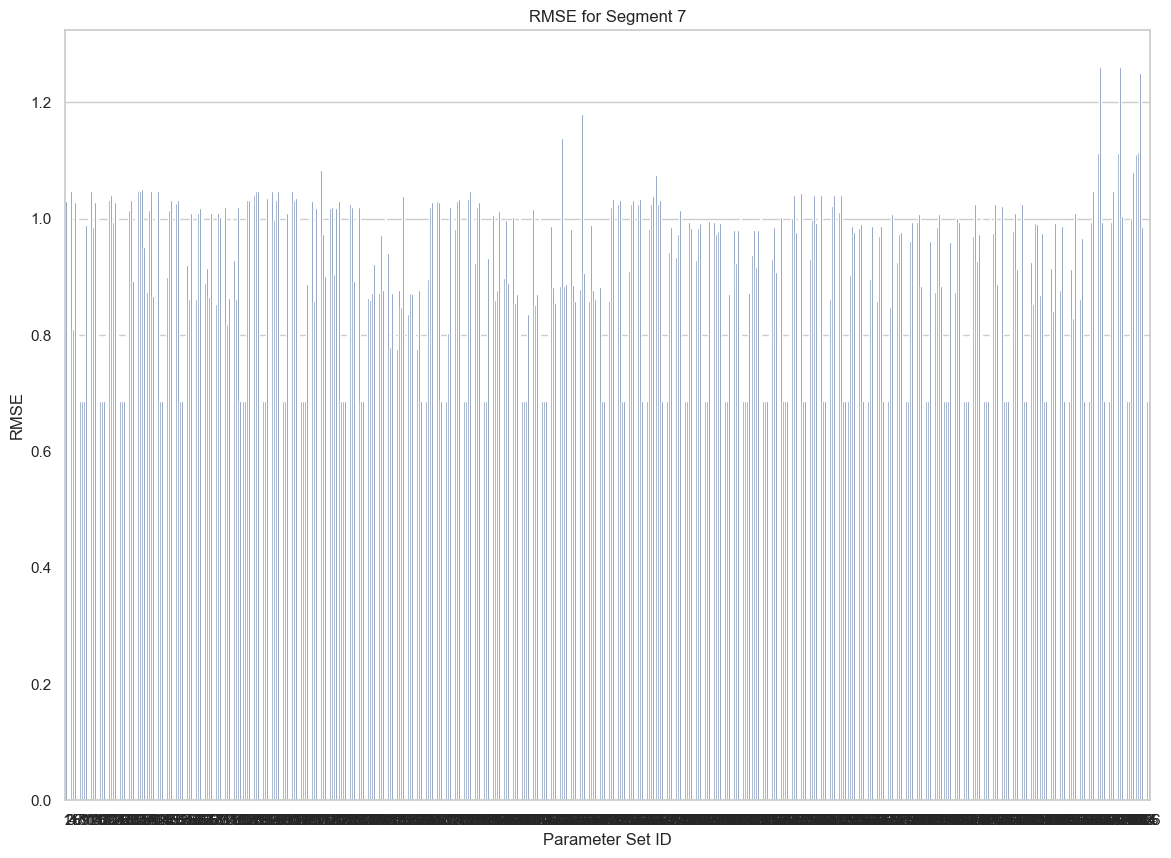

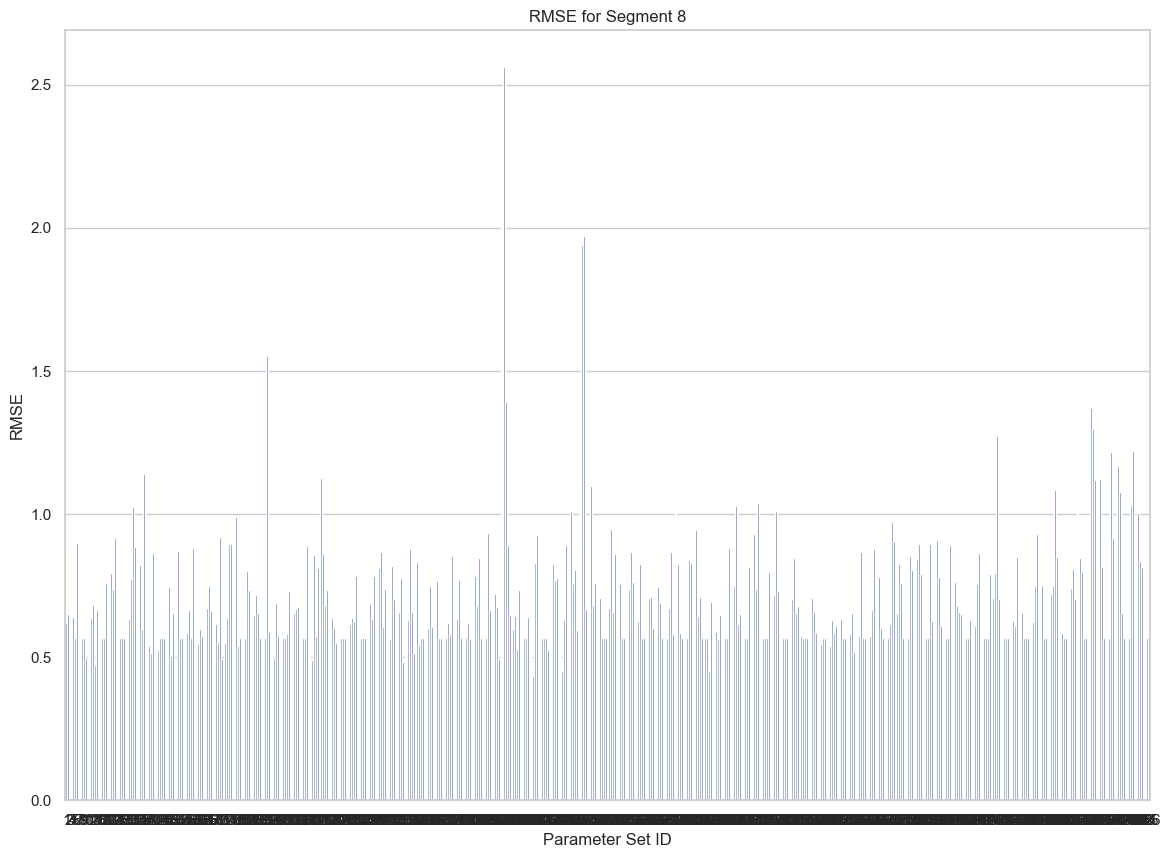

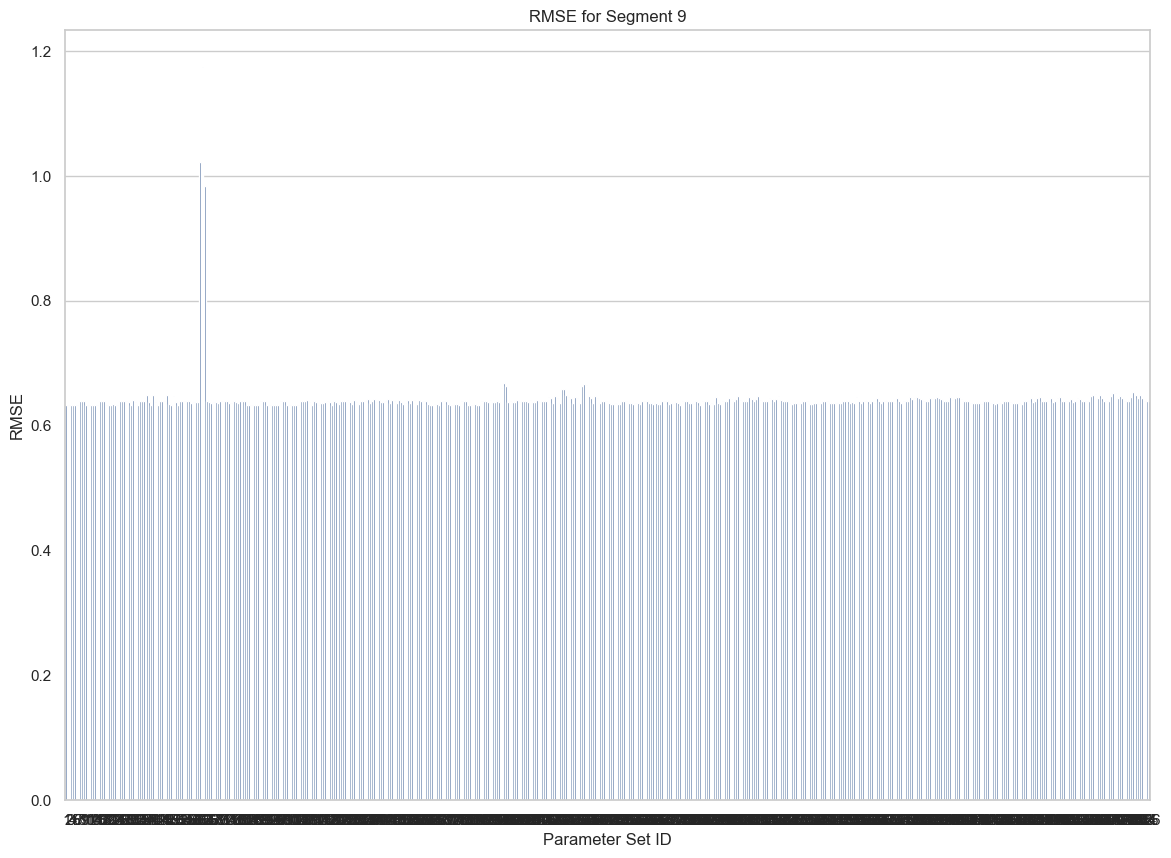

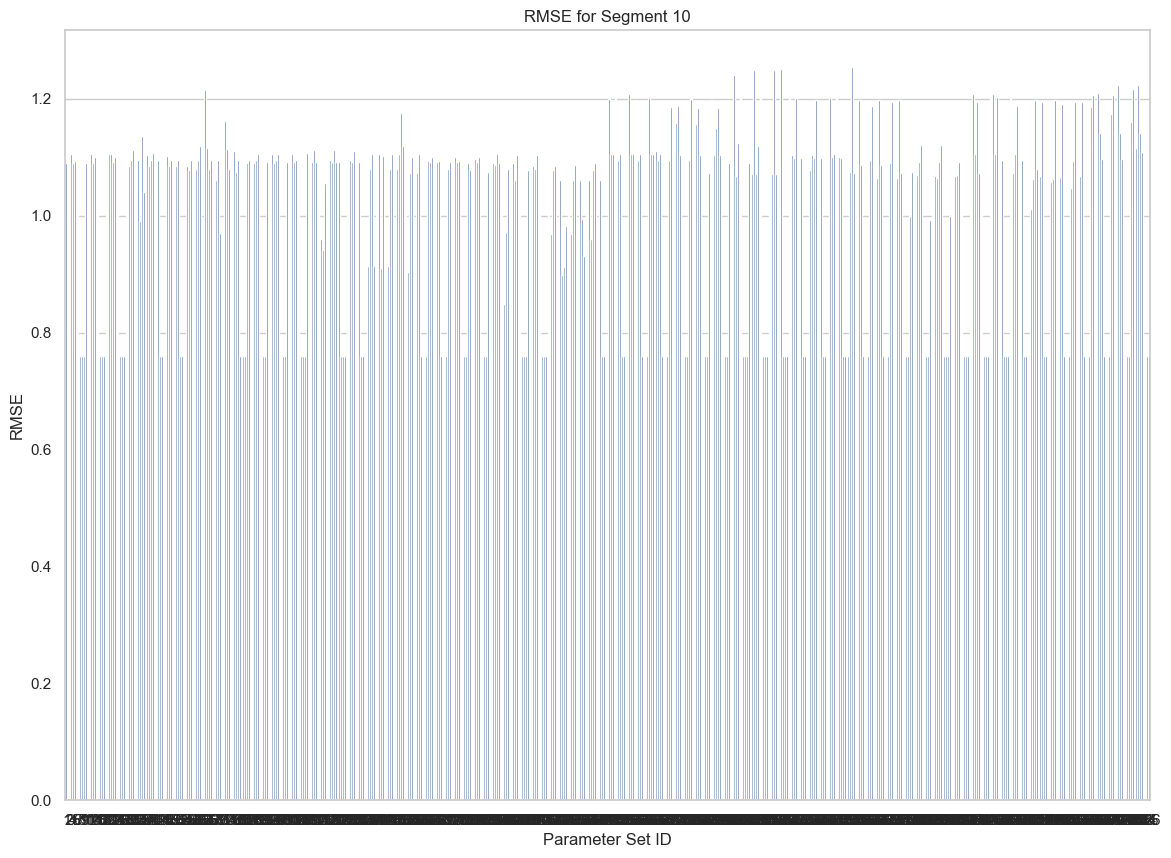

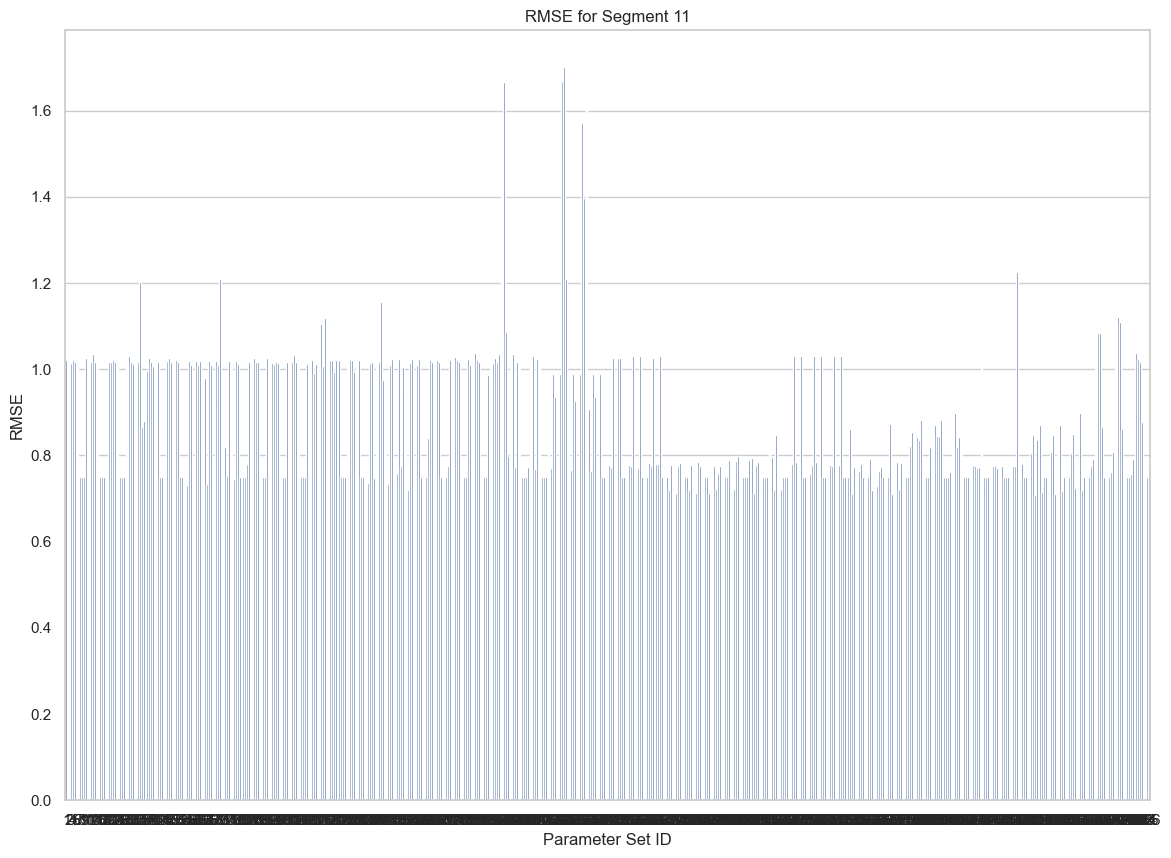

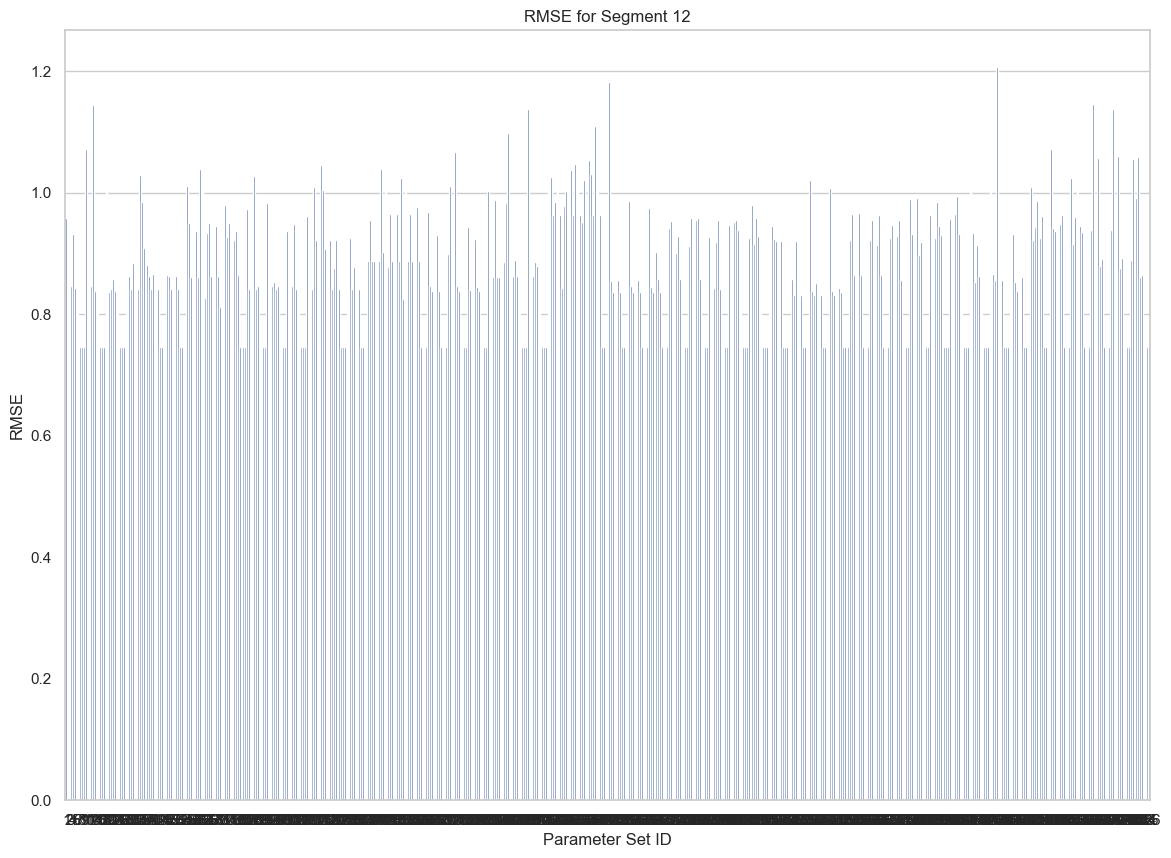

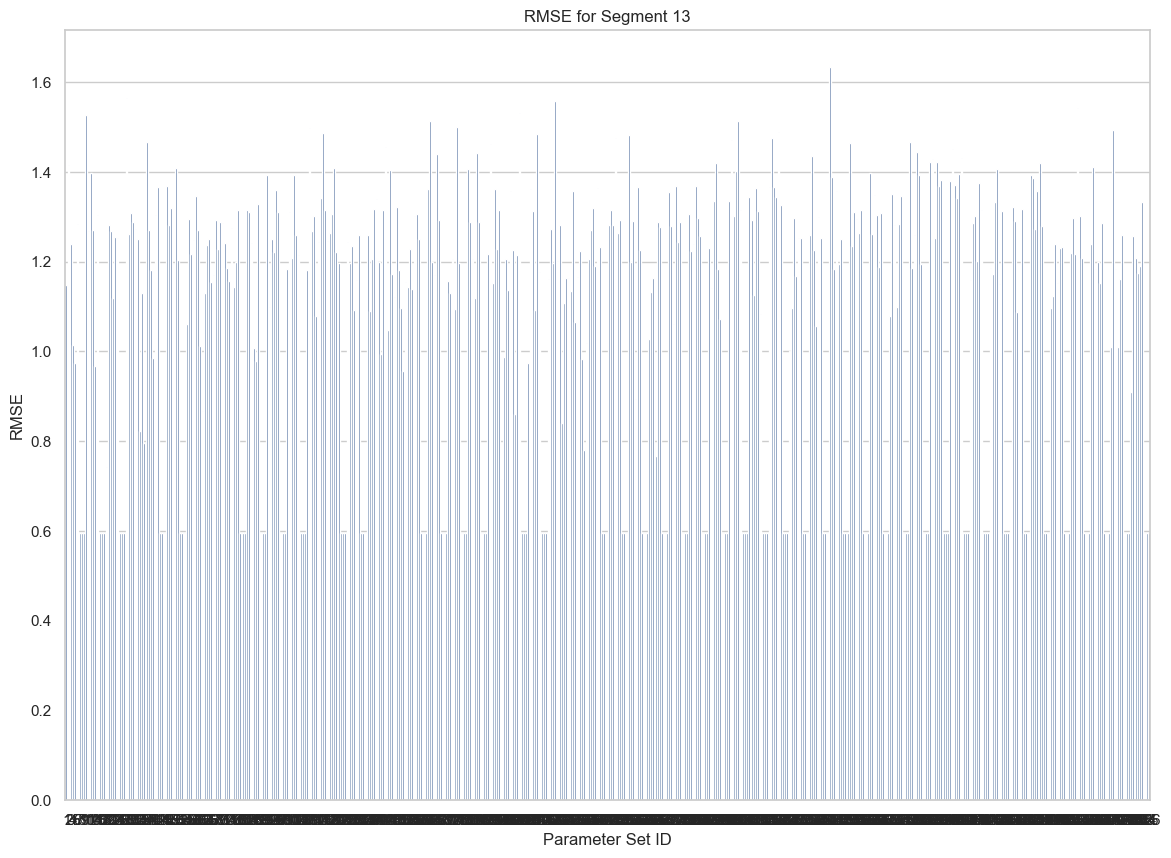

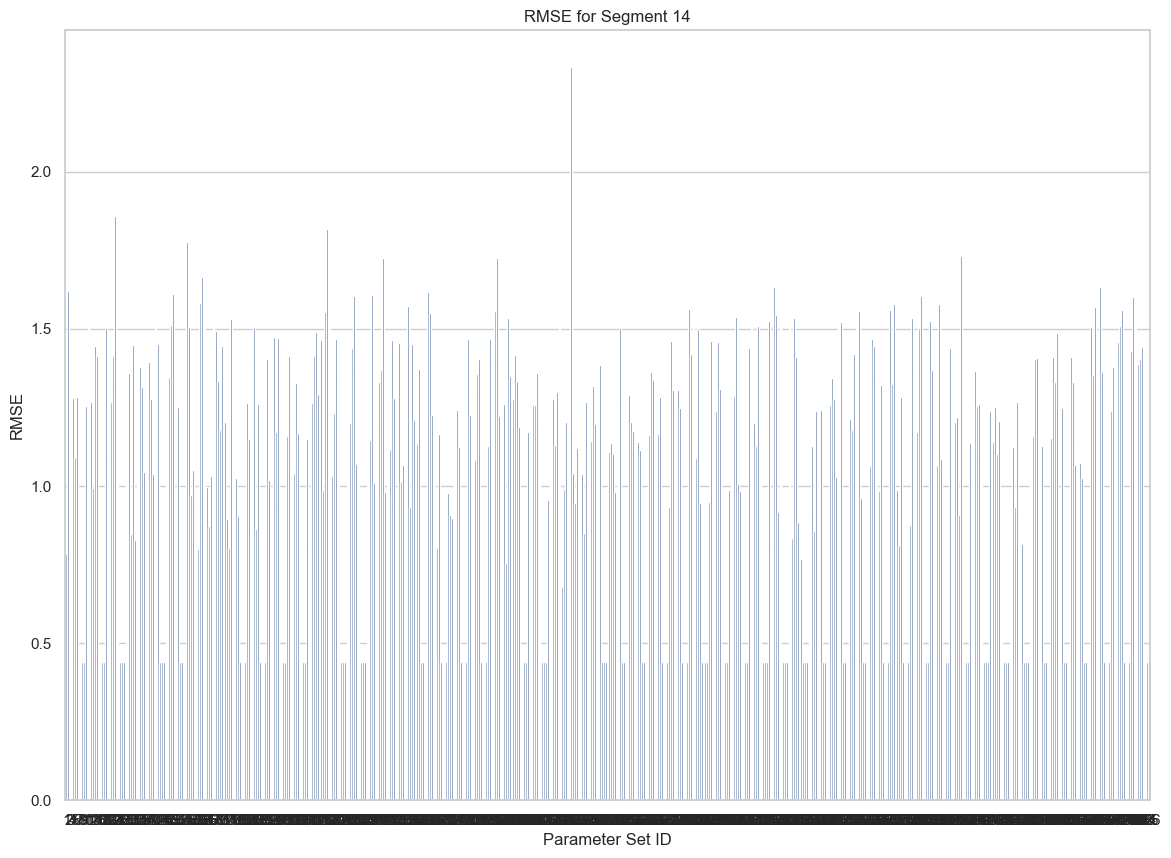

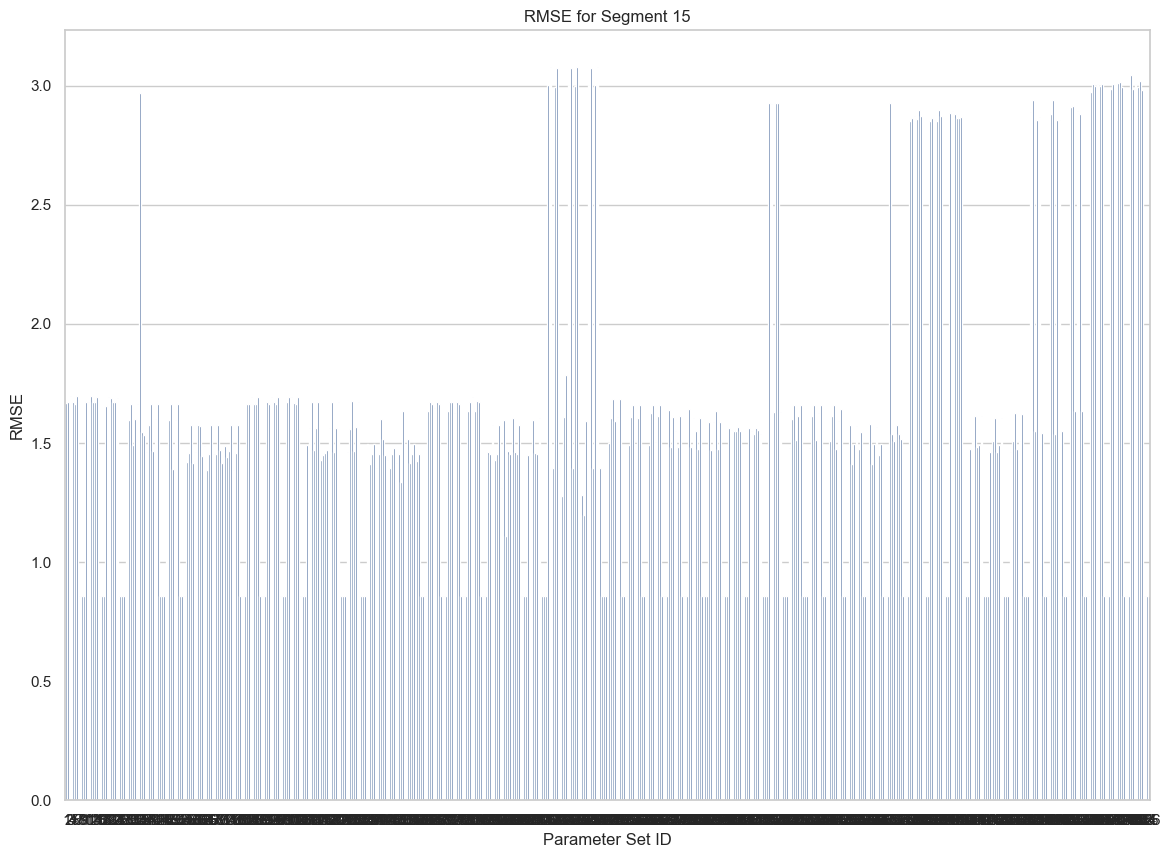

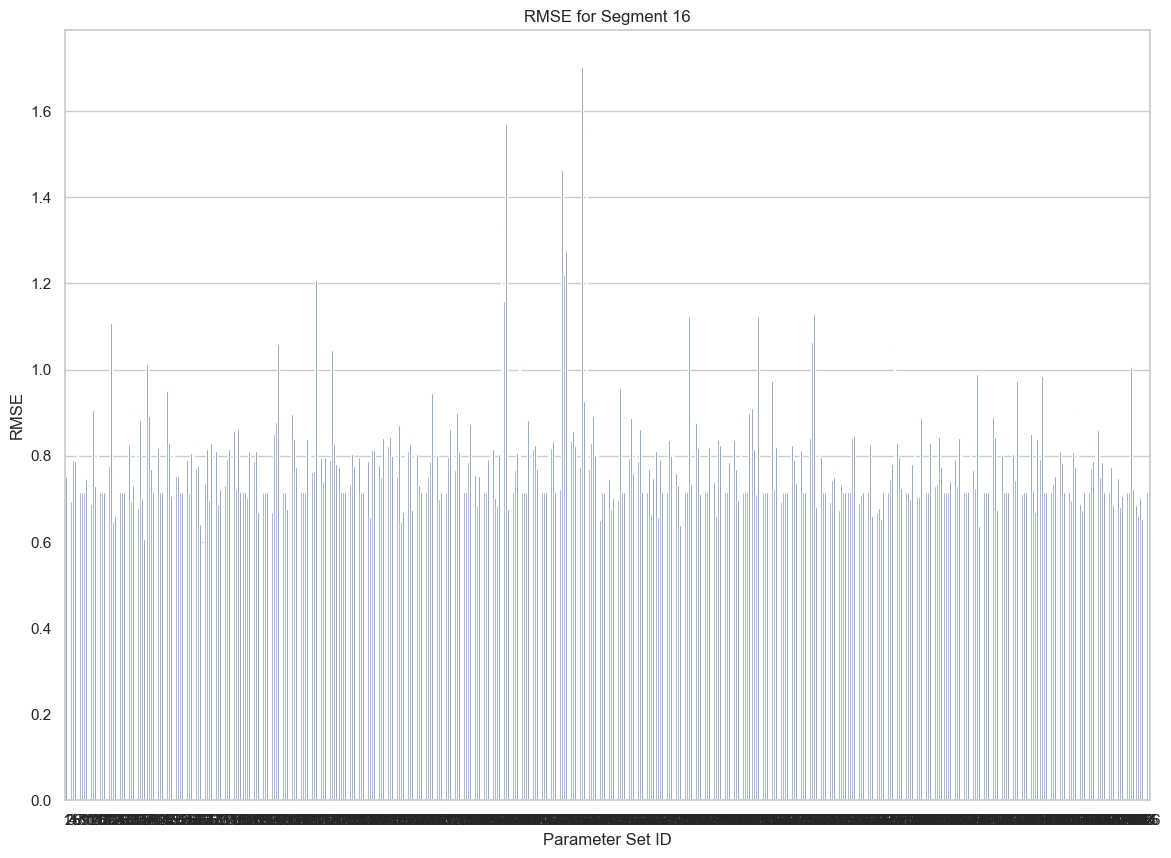

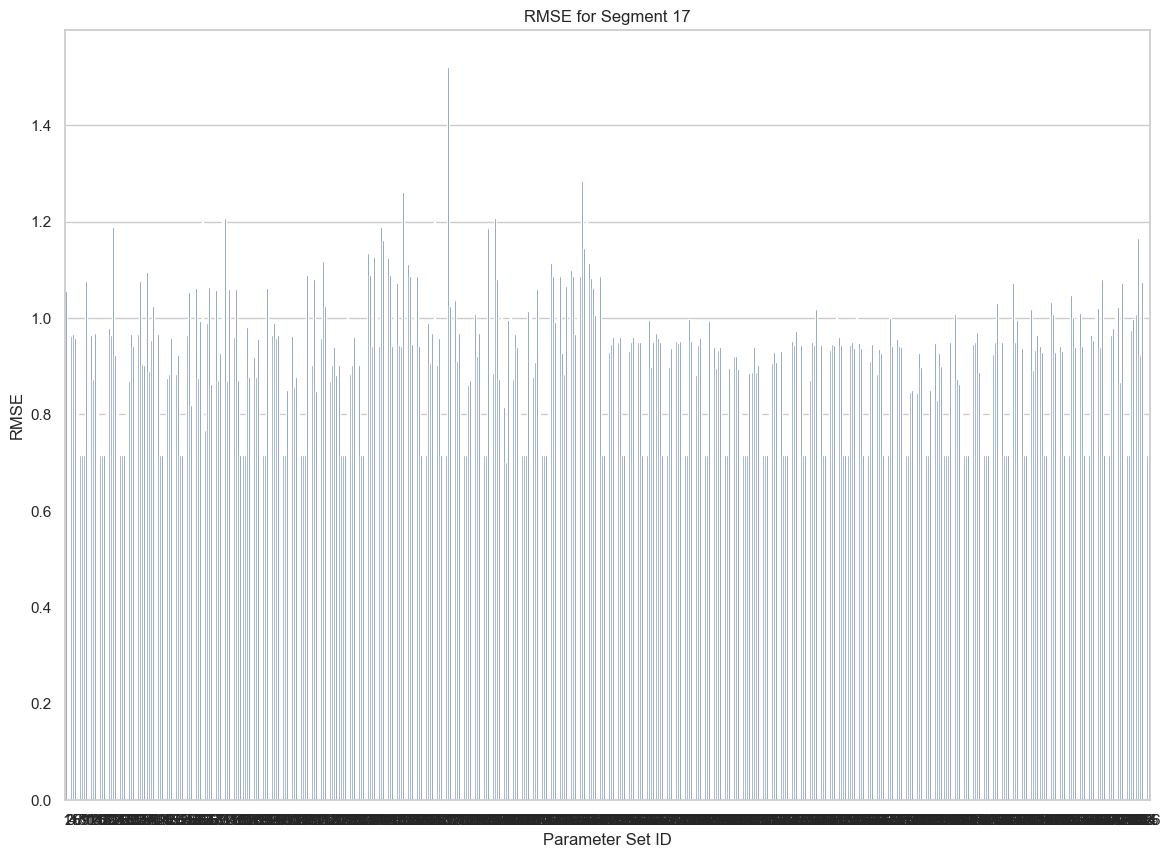

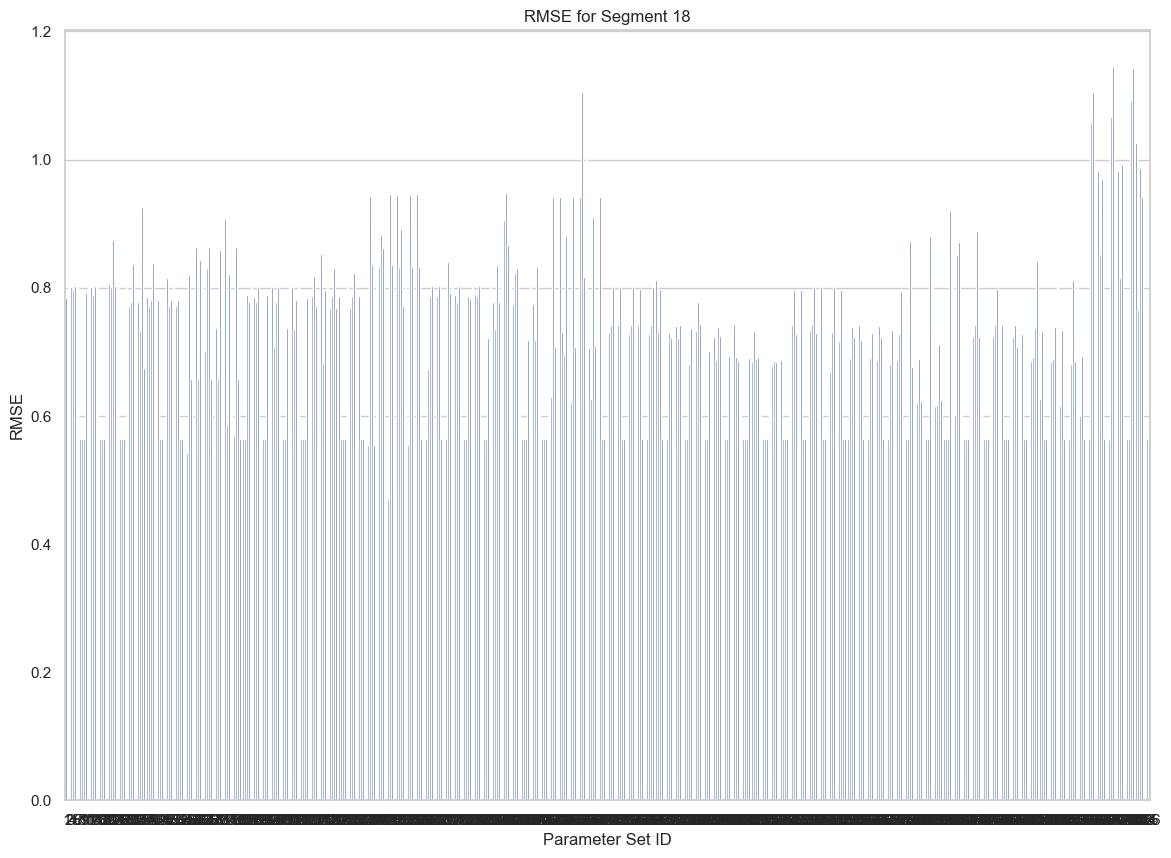

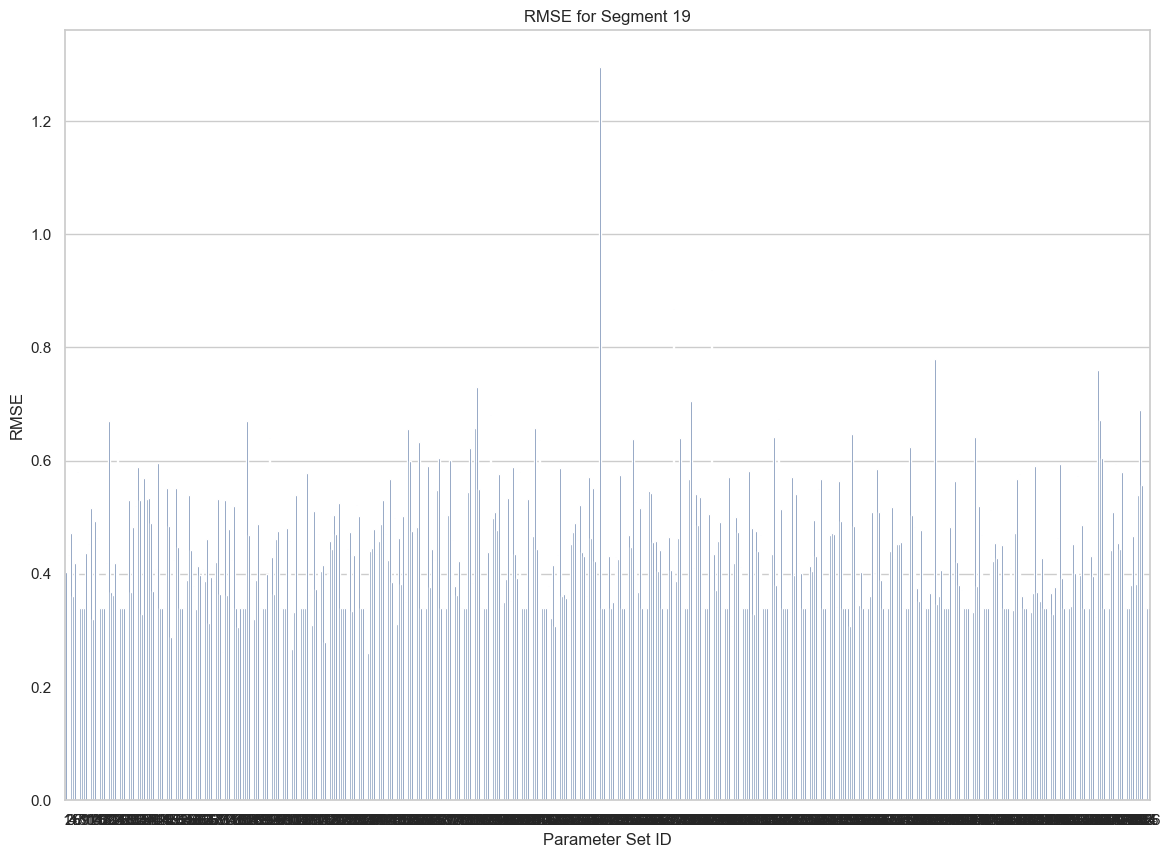

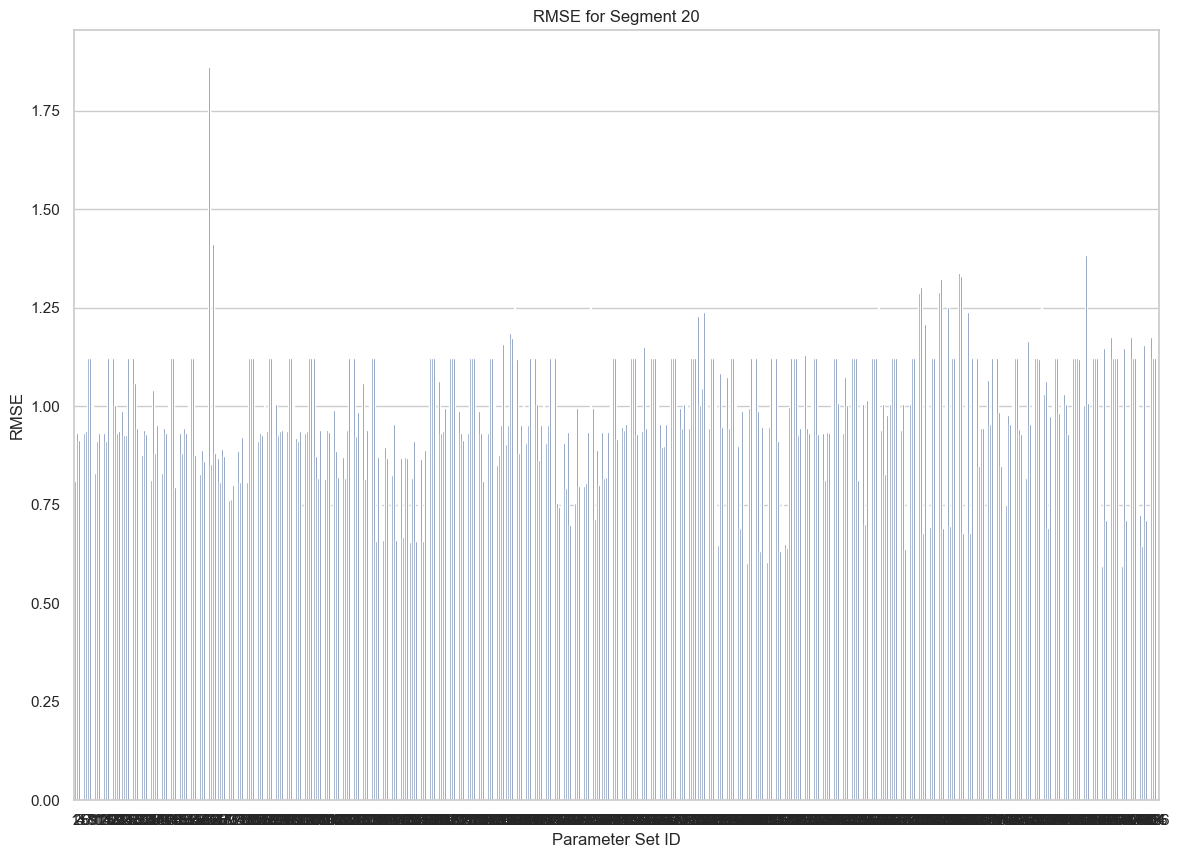

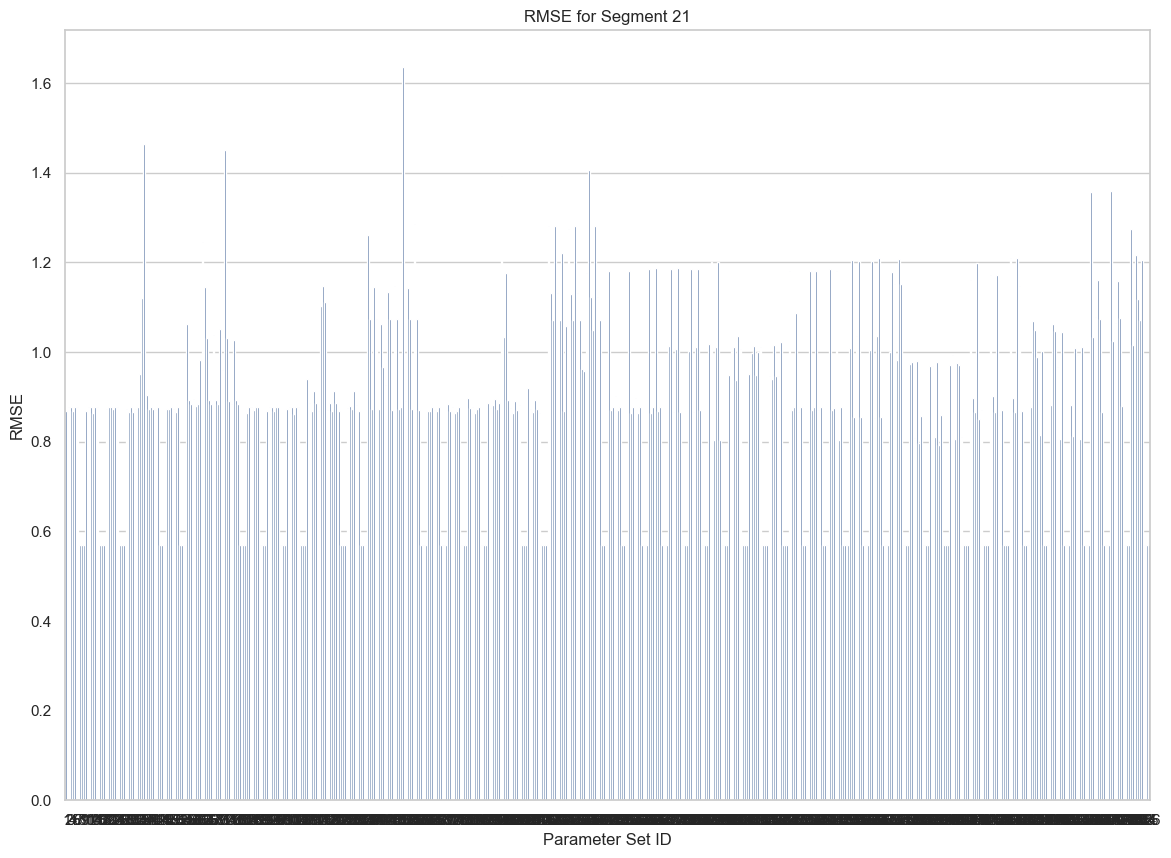

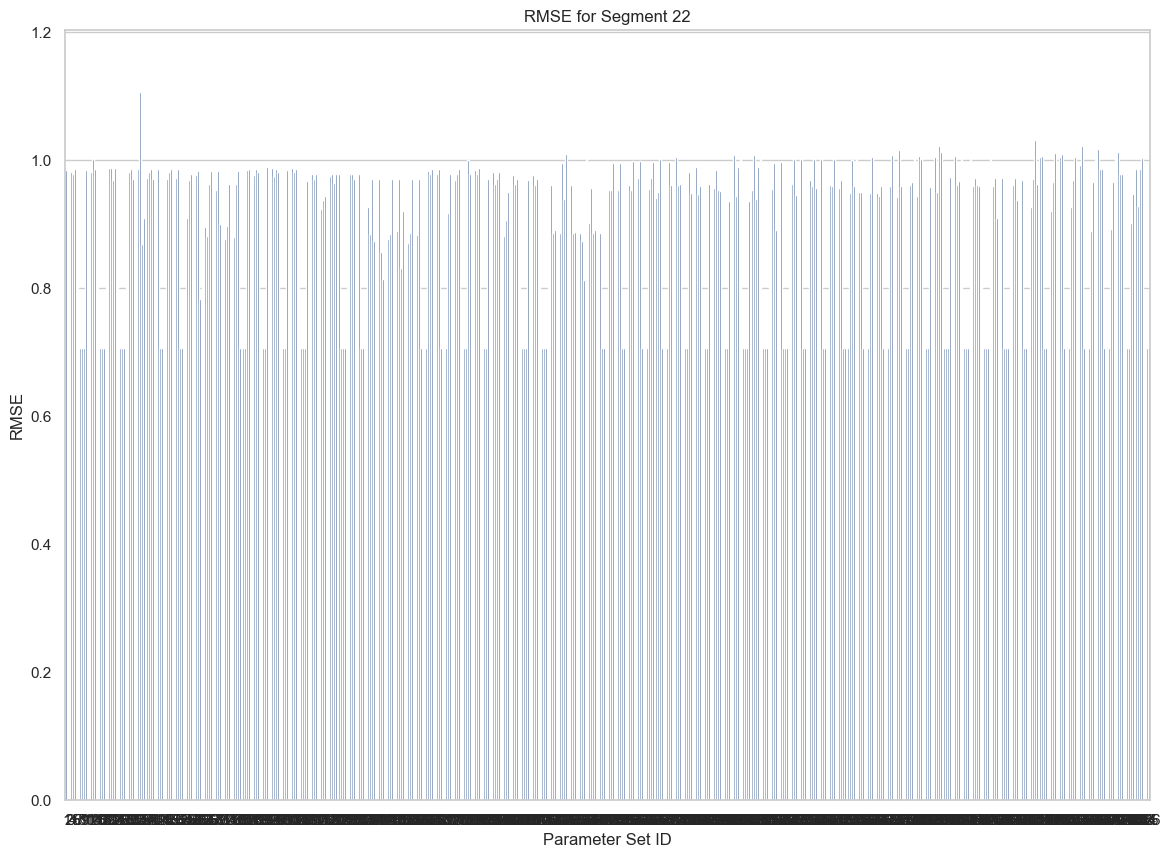

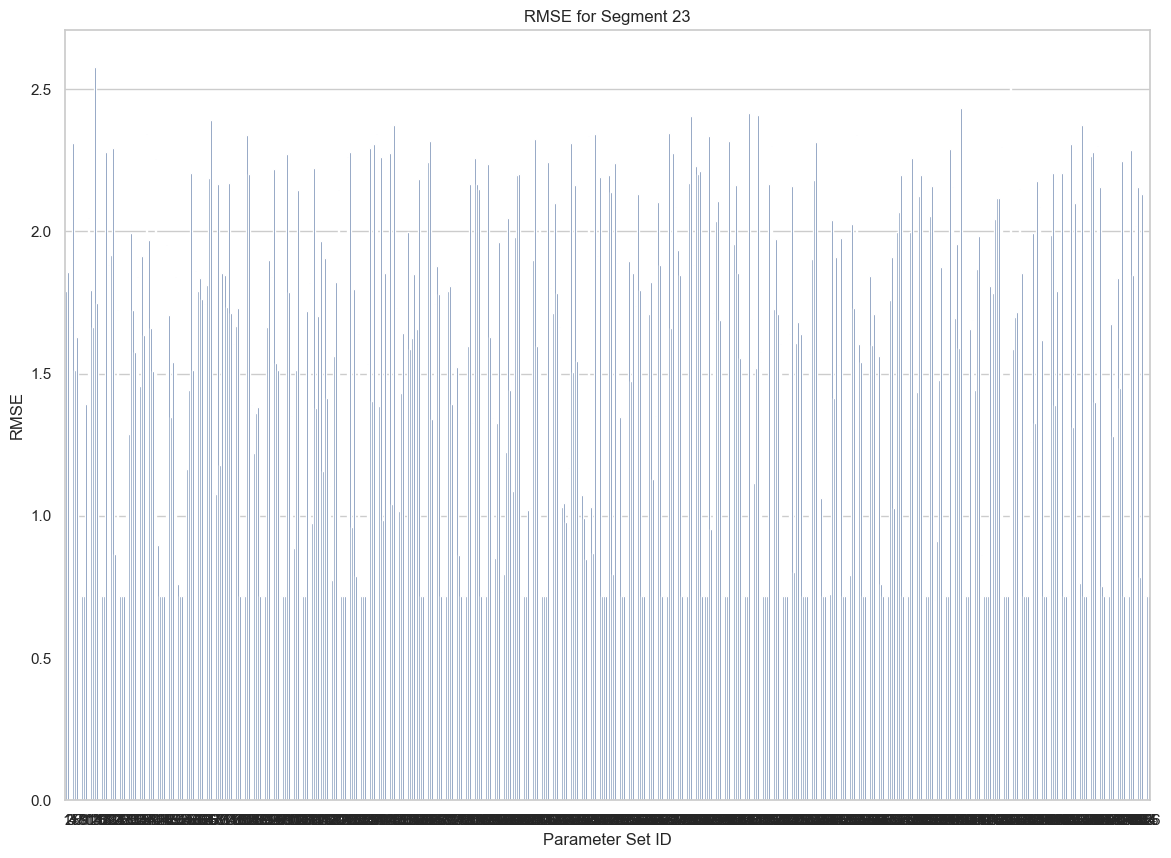

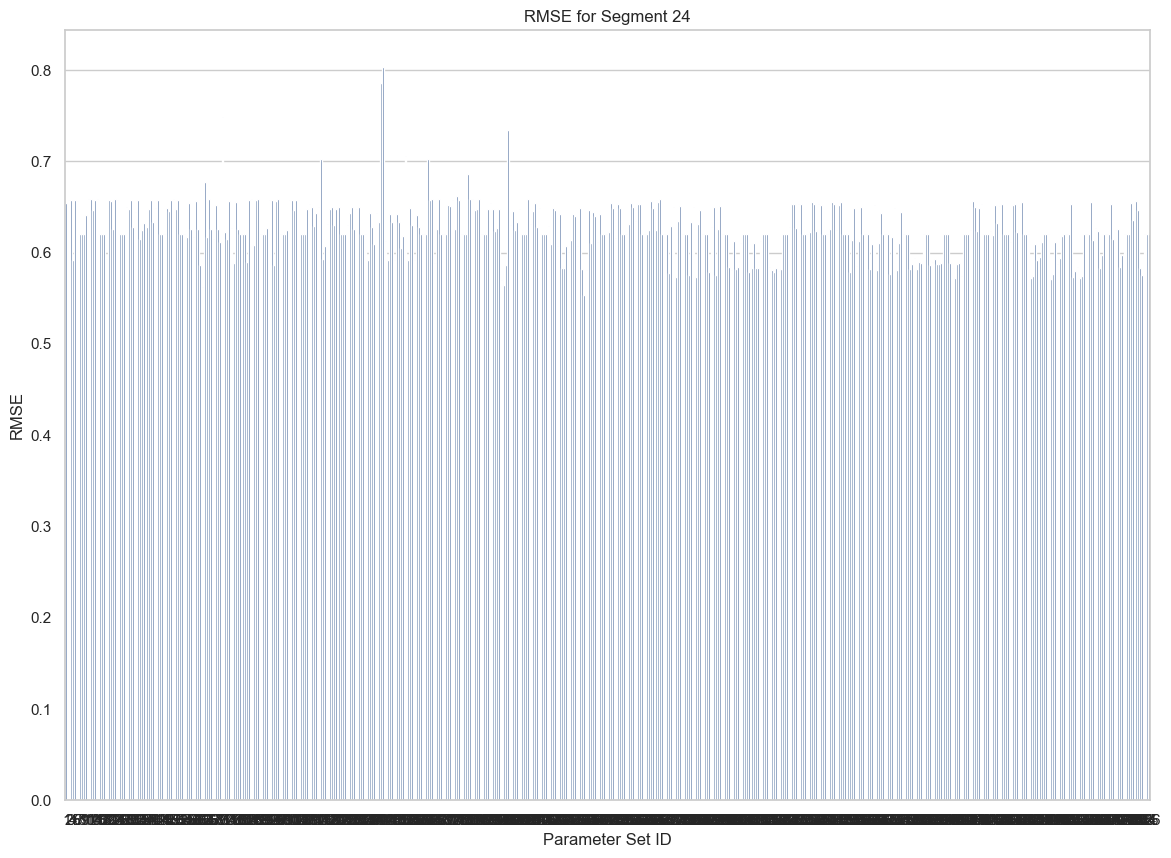

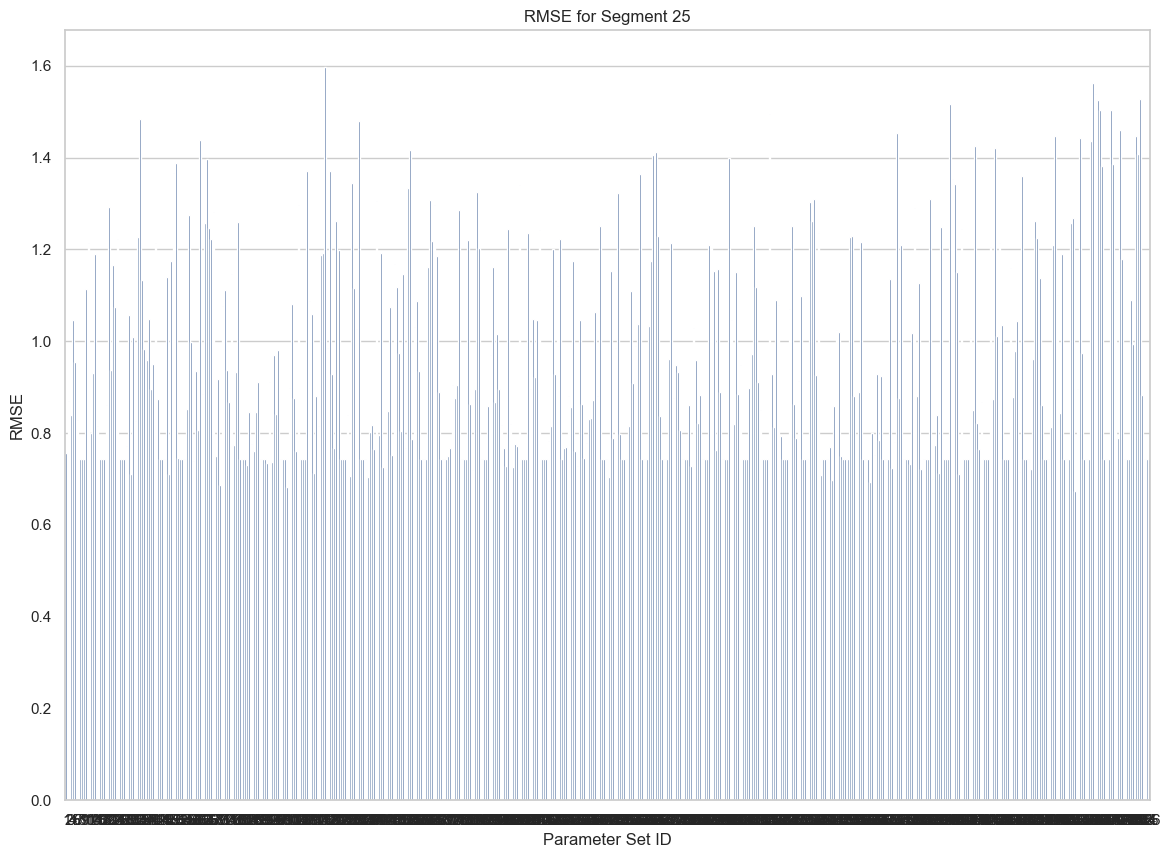

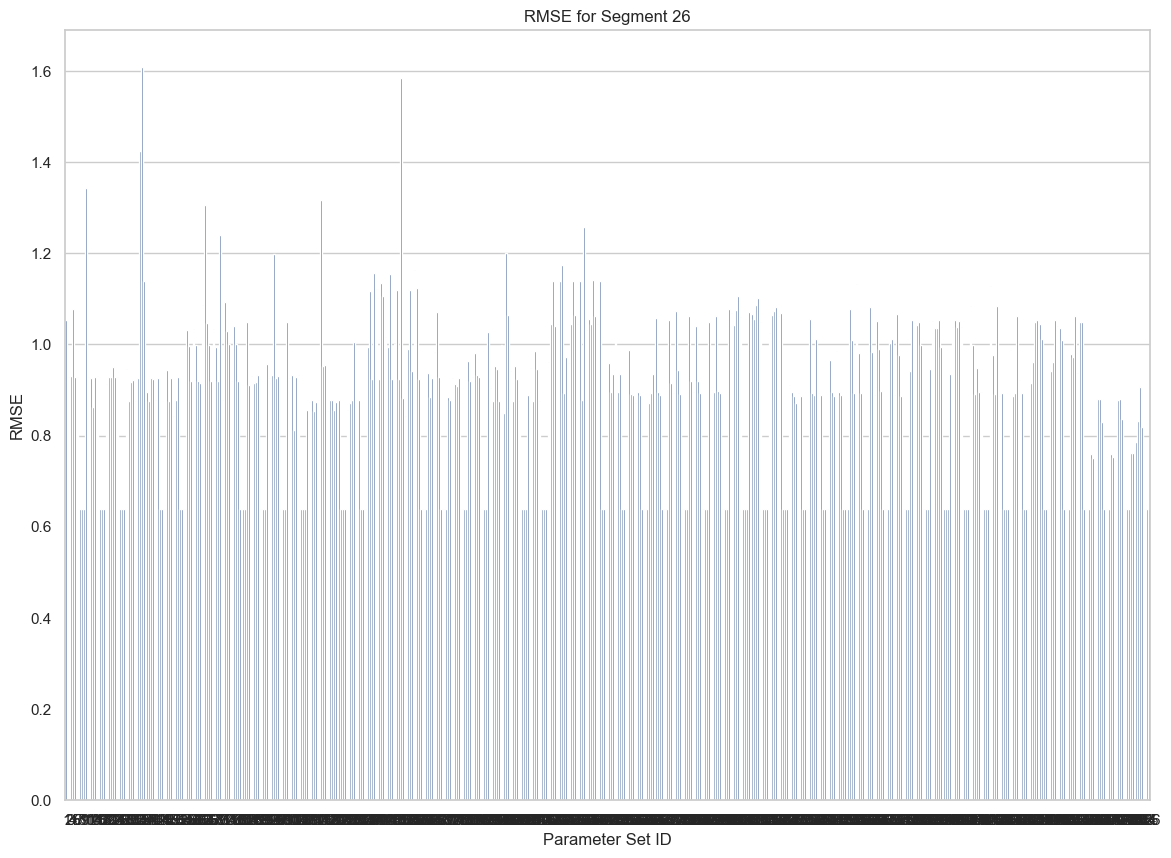

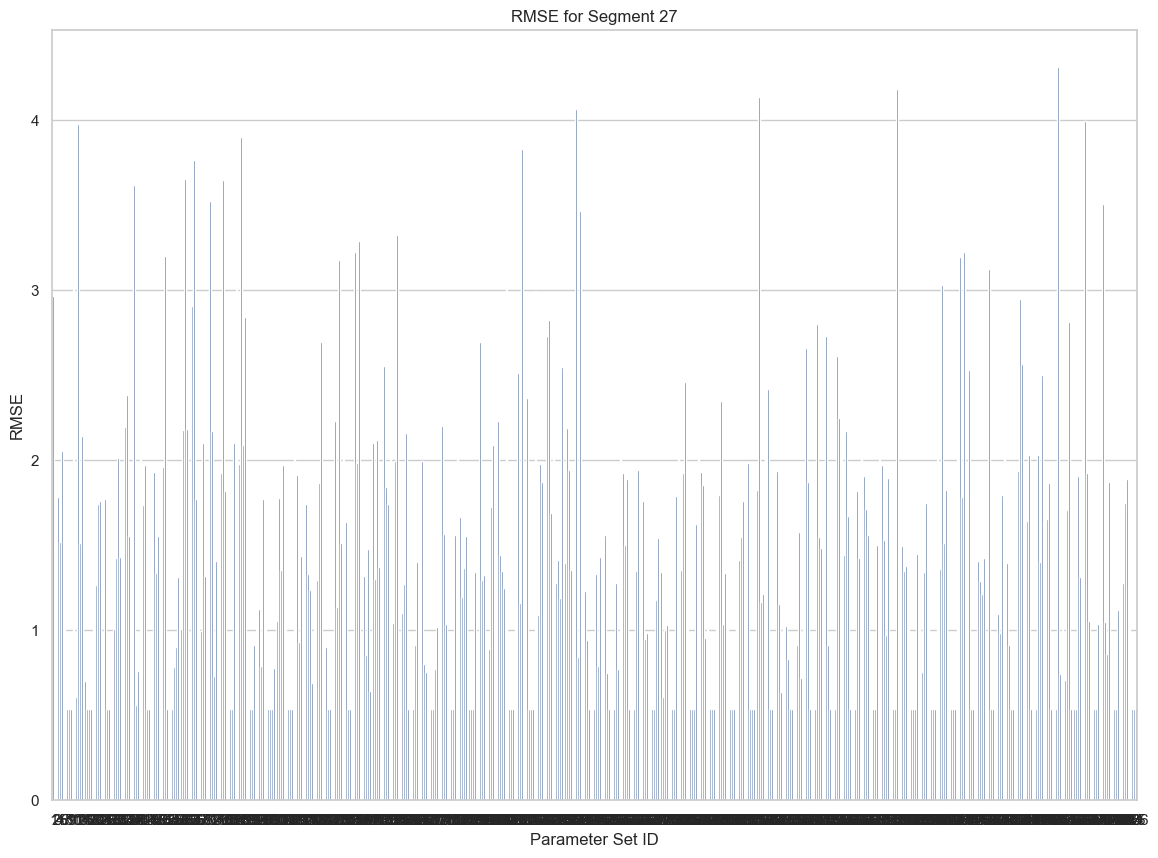

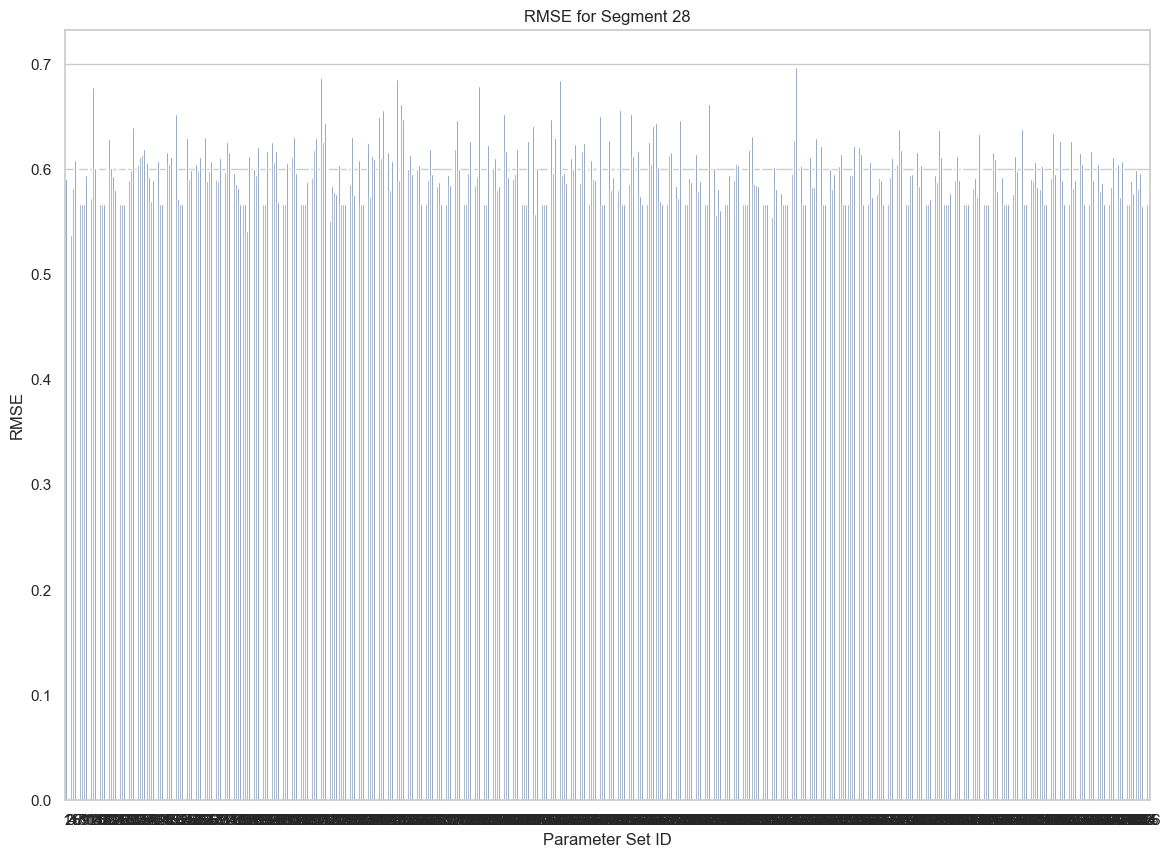

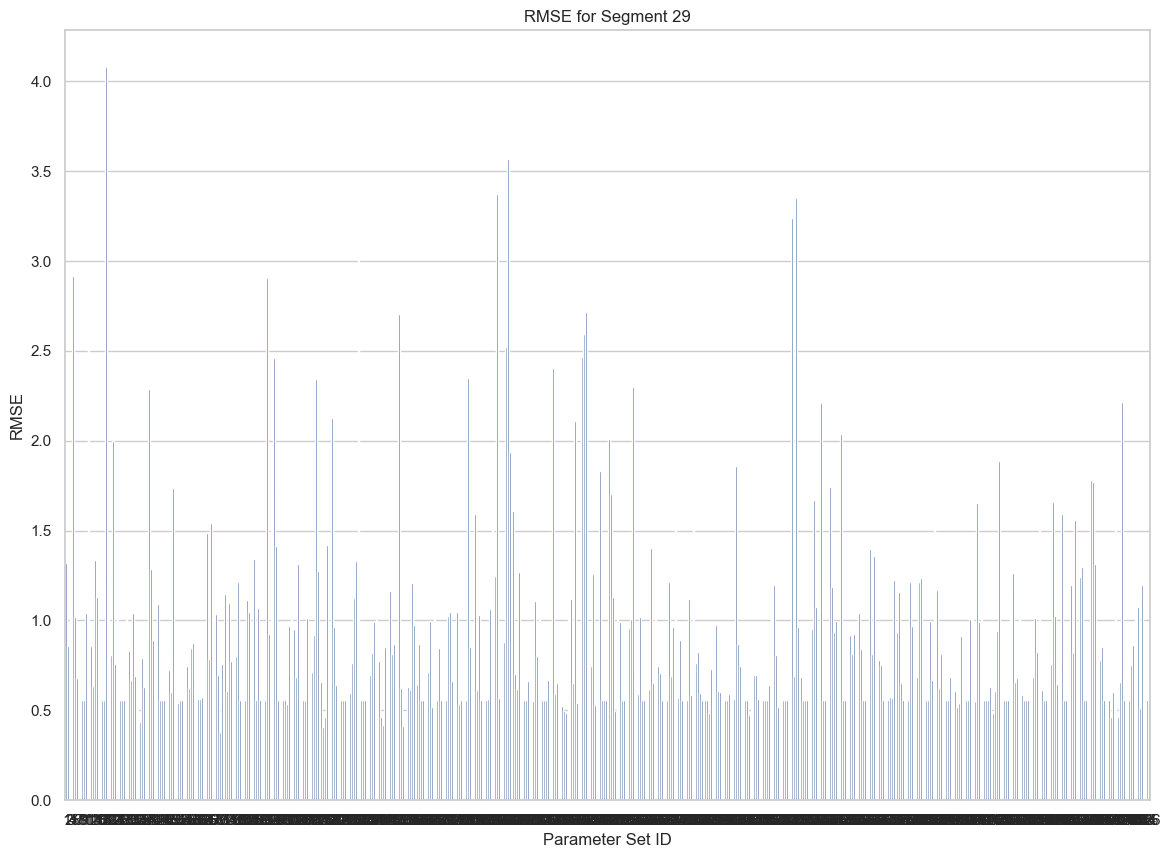

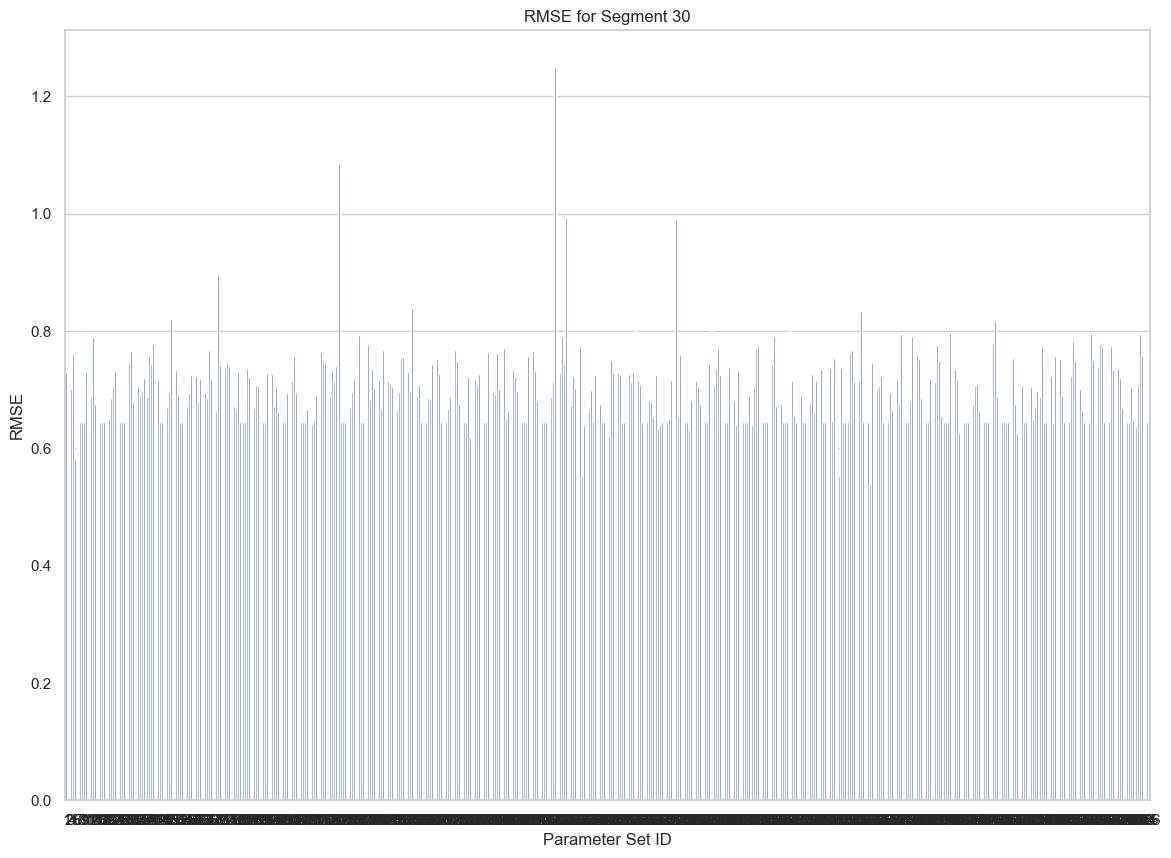

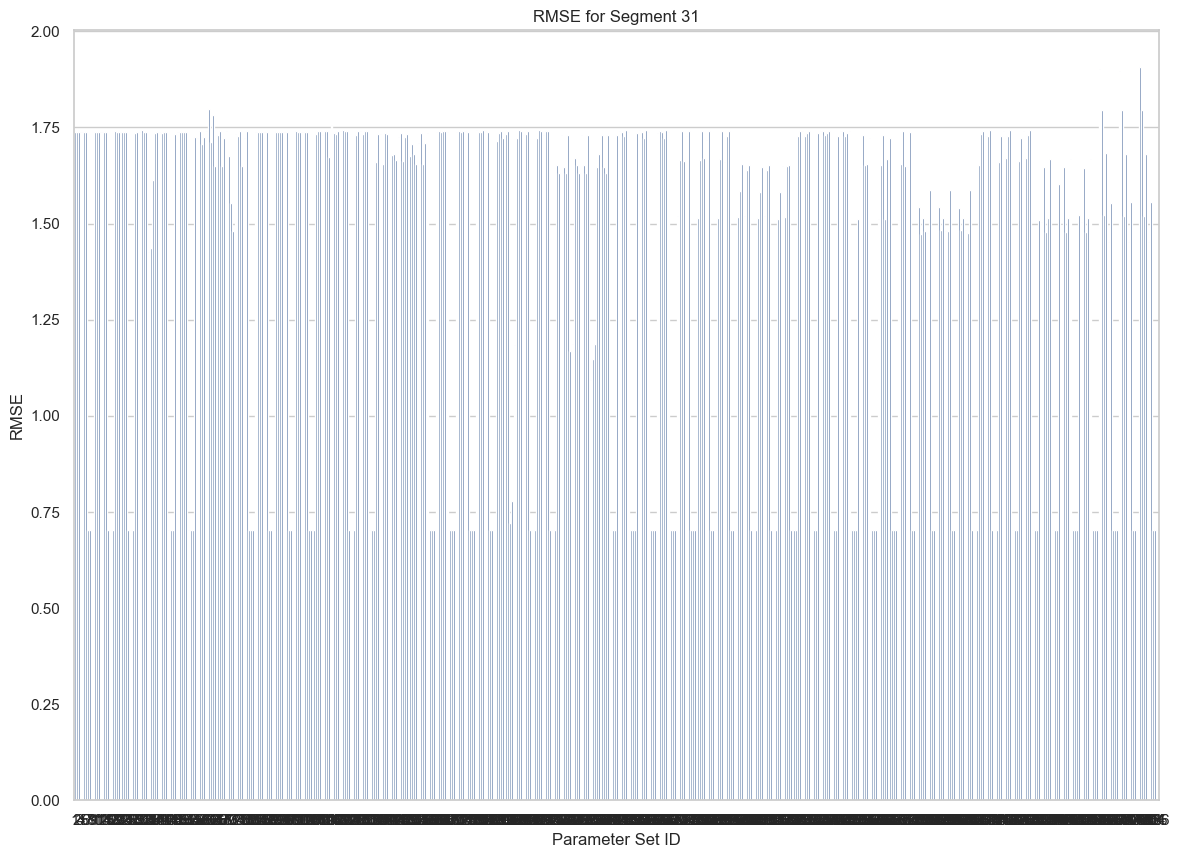

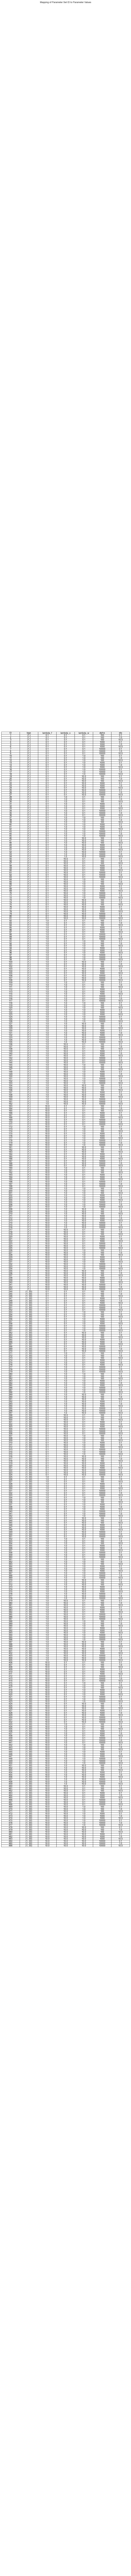

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'segment' is treated as a string or categorical variable
results_df['segment'] = results_df['segment'].astype(str)

# Convert list-type columns to tuples
results_df['lags'] = results_df['lags'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Create a unique identifier for each parameter set
results_df['param_id'] = results_df.groupby(['lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta']).ngroup() + 1

# Get unique segments
unique_segments = results_df['segment'].unique()

# Plot size customization
plt.rcParams.update({'figure.figsize': (100, 30)})

# Iterate over each segment and create a separate plot
for segment in unique_segments:
    # Filter the DataFrame for the current segment
    segment_df = results_df[results_df['segment'] == segment]

    # Create a bar plot for the current segment
    plt.figure(figsize=(14, 10))
    sns.barplot(
        x='param_id', 
        y='rmse', 
        data=segment_df
    )

    # Set plot labels and title
    plt.xlabel('Parameter Set ID')
    plt.ylabel('RMSE')
    plt.title(f'RMSE for Segment {segment}')

    # Rotate x-axis labels if needed for better readability
    plt.xticks(rotation=0)

    # Show the plot
    plt.show()

# Create a separate legend figure to map numbers to parameter sets
unique_params = results_df.drop_duplicates('param_id').sort_values('param_id')
plt.figure(figsize=(12, len(unique_params) * 0.5))  # Adjust the figure size based on the number of sets

# Plot the mapping of parameter set ID to actual parameters
plt.table(cellText=unique_params[['param_id', 'lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta']].values,
          colLabels=['ID', 'lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta'],
          cellLoc = 'center', 
          loc='center')

plt.axis('off')  # Hide the axis
plt.title('Mapping of Parameter Set ID to Parameter Values')
plt.show()


In [22]:
results_df['params'] = results_df[['lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta']].apply(lambda x: ', '.join(map(str, x)), axis=1)


In [38]:

mean_rmse_df = results_df.groupby([ 'lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta'])['rmse'].mean().reset_index()

mean_rmse_df.sort_values(by=['lags', 'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta'], ascending=[True, True, True, True, True, True]).to_excel("rmse_trmf_parameter_tuning.xlsx")

15552

In [ ]:
mean_rmse_df.